In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import random
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

## Loading data from S3

In [2]:
# s3_uri = "s3://aws-athena-query-results-378141045805-eu-west-1/primary/e28fee6c-ad6a-429f-9a52-8dff2c0481c3.csv"

In [3]:
# Path to the local data
# The variable name is kept unchanged for future references
s3_uri = "../data/smart-climate-2021/c096aced-8c13-4a71-9499-641f559ddf08.csv"

In [4]:
climate_data_2021 = pd.read_csv(s3_uri)
climate_data_2021.shape

(2539685, 69)

In [5]:
# total number of cars
print(climate_data_2021['c_van17'].nunique())

# total number of drives
print(climate_data_2021['c_driveid'].nunique())

# number of drives per car
print(climate_data_2021.groupby(['c_van17'])['c_driveid'].nunique().min(), climate_data_2021.groupby(['c_van17'])['c_driveid'].nunique().mean(), climate_data_2021.groupby(['c_van17'])['c_driveid'].nunique().max())

# min and max events per drive
print(climate_data_2021['c_driveid'].value_counts().min(), climate_data_2021['c_driveid'].value_counts().mean(), climate_data_2021['c_driveid'].value_counts().max())

23843
238803
5 10.015644004529632 430
6 10.635063211098688 99


In [6]:
climate_data_2021.head()

,c_van17,c_driveid,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_min_diff_ms_blower_level,c_blower_style,c_min_diff_ms_blower_style,c_air_dist,c_min_diff_ms_air_dist,c_auto_mode,c_min_diff_ms_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_city_drive,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_gpsregion_geohash_drive,c_gps_data_source,c_hub,c_country_iso_code,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,c_first_last_mode
0,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:17.457,19.0,Off,OFF,Off,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHRBEREITSCHAFT_HERSTELLEN,FAHREN,3,13,1881,13,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
1,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:30.618,21.5,Off,OFF,Off,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,4,13,1881,14,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
2,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:44.918,21.5,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,5,13,1881,26,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
3,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:29:10.825,24.0,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,6,13,1881,168,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
4,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:31:58.177,25.0,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,7,13,1881,488,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF


In [7]:
# Which VAN has the highest drives and how many events are there in that van?
# number of drives per car
id_of_the_van_with_most_drives = climate_data_2021.groupby(['c_van17'])['c_driveid'].nunique().idxmax()


In [8]:
climate_data_2021[climate_data_2021['c_van17'] == id_of_the_van_with_most_drives].shape

(7198, 69)

In [9]:
blower_specific_features = ['c_blower_combined', 'c_blower_level', 'c_blower_style', 'c_auto_mode', 'c_exteriortemperature_avg_celsius', 'c_target_temp']

In [10]:
auto_on = climate_data_2021[climate_data_2021['c_auto_mode'] == 'AUTO_ON']
auto_off = climate_data_2021[climate_data_2021['c_auto_mode'] == 'AUTO_OFF']

In [11]:
auto_on[blower_specific_features + ['c_first_last_mode', 'c_air_dist', 'c_air_mode_combined']]

,c_blower_combined,c_blower_level,c_blower_style,c_auto_mode,c_exteriortemperature_avg_celsius,c_target_temp,c_first_last_mode,c_air_dist,c_air_mode_combined
19,KS_1,BL_1,KS_1,AUTO_ON,7.50,23.0,OFF -> OFF,UNTEN,AUTO
20,KS_1,BL_1,KS_1,AUTO_ON,7.50,28.0,OFF -> OFF,UNTEN,AUTO
21,KS_4,BL_4,KS_4,AUTO_ON,7.50,28.0,OFF -> OFF,UNTEN,AUTO
22,KS_5,BL_5,KS_5,AUTO_ON,7.50,28.0,OFF -> OFF,UNTEN,AUTO
28,KS_5,BL_5,KS_5,AUTO_ON,7.50,26.0,OFF -> OFF,UNTEN,AUTO
...,...,...,...,...,...,...,...,...,...
2539680,KS_3,BL_3,KS_3,AUTO_ON,-2.25,24.0,OFF -> OFF,OBEN_S_MITTE,AUTO
2539681,KS_3,BL_3,KS_3,AUTO_ON,-2.25,24.0,OFF -> OFF,OBEN_S_MITTE,AUTO
2539682,KS_3,BL_3,KS_3,AUTO_ON,-2.25,21.0,OFF -> OFF,OBEN_S_MITTE,AUTO
2539683,KS_3,BL_3,KS_3,AUTO_ON,-2.25,20.0,OFF -> OFF,OBEN_S_MITTE,AUTO


In [12]:
# Observation 1: Whenever the c_auto_mode is ON the c_blower_combined and c_blower_style are equal
# But there is no relation of it with the c_blower_level
(auto_on['c_blower_style'] == auto_on['c_blower_combined']).sum() == auto_on.shape[0]

True

In [13]:
auto_off[blower_specific_features + ['c_first_last_mode', 'c_air_dist', 'c_air_mode_combined']]

,c_blower_combined,c_blower_level,c_blower_style,c_auto_mode,c_exteriortemperature_avg_celsius,c_target_temp,c_first_last_mode,c_air_dist,c_air_mode_combined
0,Off,Off,KS_5,AUTO_OFF,4.00,19.0,OFF -> OFF,MITTE_S_UNTEN,OFF
1,Off,Off,KS_5,AUTO_OFF,4.00,21.5,OFF -> OFF,MITTE_S_UNTEN,OFF
2,BL_9,BL_9,KS_5,AUTO_OFF,4.00,21.5,OFF -> OFF,MITTE_S_UNTEN,MITTE_S_UNTEN
3,BL_9,BL_9,KS_5,AUTO_OFF,4.00,24.0,OFF -> OFF,MITTE_S_UNTEN,MITTE_S_UNTEN
4,BL_9,BL_9,KS_5,AUTO_OFF,4.00,25.0,OFF -> OFF,MITTE_S_UNTEN,MITTE_S_UNTEN
...,...,...,...,...,...,...,...,...,...
2539673,BL_3,BL_3,KS_1,AUTO_OFF,8.25,20.0,OFF -> OFF,OBEN_S_MITTE_S_UNTEN,OBEN_S_MITTE_S_UNTEN
2539674,BL_3,BL_3,KS_1,AUTO_OFF,8.25,18.5,OFF -> OFF,OBEN_S_MITTE_S_UNTEN,OBEN_S_MITTE_S_UNTEN
2539675,Off,Off,KS_3,AUTO_OFF,-2.25,26.0,OFF -> OFF,OBEN_S_MITTE,OFF
2539676,Off,Off,KS_3,AUTO_OFF,-2.25,28.0,OFF -> OFF,OBEN_S_MITTE,OFF


In [14]:
(climate_data_2021['c_auto_mode'] + climate_data_2021['c_blower_level'] + climate_data_2021['c_blower_style'])

0           AUTO_OFFOffKS_5
1           AUTO_OFFOffKS_5
2          AUTO_OFFBL_9KS_5
3          AUTO_OFFBL_9KS_5
4          AUTO_OFFBL_9KS_5
                 ...       
2539680     AUTO_ONBL_3KS_3
2539681     AUTO_ONBL_3KS_3
2539682     AUTO_ONBL_3KS_3
2539683     AUTO_ONBL_3KS_3
2539684     AUTO_ONBL_3KS_3
Length: 2539685, dtype: object

In [15]:
climate_data_2021['c_blower_level'].nunique()

10

In [16]:
climate_data_2021['c_blower_style'].nunique()

5

In [17]:
climate_data_2021['c_auto_mode'].nunique()

2

In [18]:
climate_data_2021['c_air_mode_combined'].unique()

array(['OFF', 'MITTE_S_UNTEN', 'MAX_AC', 'OBEN', 'OBEN_S_MITTE', 'AUTO',
       'UNTEN', 'OBEN_S_UNTEN', 'OBEN_S_MITTE_S_UNTEN', 'MITTE',
       'DEFROST'], dtype=object)

In [19]:
climate_data_2021['c_auto_mode'].nunique() * climate_data_2021['c_blower_style'].nunique() * climate_data_2021['c_blower_level'].nunique()

100

In [20]:
# Observation 1: Whenever the c_auto_mode is OFF the c_blower_combined and c_blower_level are equal
# But there is no relation of it with the c_blower_style
(auto_off['c_blower_level'] == auto_off['c_blower_combined']).sum() == auto_off.shape[0]

True

In [21]:
# We can combine the c_auto_mode + c_blower_style + c_blower_level
# IF AUTO_OFF ---> c_blower_combined = c_blower_level
# IF AUTO_ON ----> c_blower_combined = c_blower_style

In [22]:
climate_data_2021[climate_data_2021['c_first_last_mode'] == 'OFF -> MANUAL']['c_target_temp'].unique()

array([18. , 17. , 16.5, 16. , 18.5, 20.5, 21. , 21.5, 17.5, 19. , 24. ,
       22. , 20. , 28. , 23.5, 24.5, 26. , 27. , 19.5, 23. , 25. , 25.5,
       22.5, 26.5, 27.5])

In [23]:
# Get a glimpse of the dataset
climate_data_2021.head()

,c_van17,c_driveid,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_min_diff_ms_blower_level,c_blower_style,c_min_diff_ms_blower_style,c_air_dist,c_min_diff_ms_air_dist,c_auto_mode,c_min_diff_ms_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_city_drive,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_gpsregion_geohash_drive,c_gps_data_source,c_hub,c_country_iso_code,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,c_first_last_mode
0,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:17.457,19.0,Off,OFF,Off,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHRBEREITSCHAFT_HERSTELLEN,FAHREN,3,13,1881,13,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
1,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:30.618,21.5,Off,OFF,Off,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,4,13,1881,14,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
2,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:44.918,21.5,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,5,13,1881,26,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
3,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:29:10.825,24.0,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,6,13,1881,168,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
4,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:31:58.177,25.0,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,7,13,1881,488,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.3,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.7,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF


In [24]:
# Let's see the data types
data_types = climate_data_2021.dtypes.unique()
for dtype in data_types:
    print(f"{dtype}: {(climate_data_2021.dtypes == dtype).sum()}")

object: 33
float64: 24
int64: 8
bool: 4


### Curate the dataset
1. delete the drives which had only temperatures 16 and 28
2. delete the events where there was no change in the temp (not yet)
3. delet the events with 0 second duration

#### Backup

In [25]:
climate_data_2021.head(20)

,c_van17,c_driveid,c_drive_timestamp_start,c_drive_timestamp_stop,c_msg_creation_timestamp,c_target_temp,c_blower_combined,c_air_mode_combined,c_blower_level,c_min_diff_ms_blower_level,c_blower_style,c_min_diff_ms_blower_style,c_air_dist,c_min_diff_ms_air_dist,c_auto_mode,c_min_diff_ms_auto_mode,c_pwf,c_pwf_group,c_row_number_drive,c_number_of_rows_drive,c_only_driving_duration_sec,c_event_duration_sec,c_min_diff_ms_target_temp,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_interiortemperature_startup_celsius,c_drive_duration_sec,c_drive_duration_minutes,c_drive_weekday,c_year_month_day,c_weekofyear_year,c_weekend_drive,c_vehicle_live_time_days,c_avg_drives_per_day,c_avg_drives_per_week,c_avg_drives_per_month,c_timezonedelta,c_gpsregion_city_drive,c_gpsregion_lat_drive,c_gpsregion_long_drive,c_gpsregion_geohash_drive,c_gps_data_source,c_hub,c_country_iso_code,c_order_country,c_brand,c_derivat,c_marketing_name,c_steering_wheel_position,c_product_line,c_hybridkennzeichen,c_fuel_type_corrected_description,c_vehicle_class,c_script_version,c_mean_speed,c_mileage_start,c_mileage_stop,c_mileage_delta,c_bcbehvenergystart_kwh,c_bcbehvenergyend_kwh,c_drive_number_per_car,c_number_of_drives_per_car,c_gcad,c_is_active_profile,c_is_guest_profile,c_touchscreen_used,c_touchscreen_used_count,c_first_last_mode
0,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:17.457,19.0,Off,OFF,Off,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHRBEREITSCHAFT_HERSTELLEN,FAHREN,3,13,1881,13,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.30,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.70,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
1,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:30.618,21.5,Off,OFF,Off,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,4,13,1881,14,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.30,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.70,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
2,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:28:44.918,21.5,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,5,13,1881,26,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.30,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.70,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
3,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:29:10.825,24.0,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,6,13,1881,168,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.30,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.70,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
4,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCFfjhx2JBiSugEHZ...,9JN83ATKHZQT8KW33,2021-11-20 02:28:01.440,2021-11-20 03:00:11.068,2021-11-20 02:31:58.177,25.0,BL_9,MITTE_S_UNTEN,BL_9,201.0,KS_5,inf,MITTE_S_UNTEN,inf,AUTO_OFF,inf,FAHREN,FAHREN,7,13,1881,488,1.0,2.5,4.0,5.5,10.0,1930,32.2,Fri,2021_11_20,46_2021,True,421.04,0.47,3.29,14.30,19.0,Whiting,40.0,-74.2,"40.0, -74.2",original,US,US,US,BMW,G01,X3 xDrive30i,LL,LK,NOHY,petrol,KKL+,MGUV6,8.81,5022.95,5027.65,4.70,0.0,0.0,111,196,GUEST_PROFILE,False,True,True,371,OFF -> OFF
5,AAOck+qht/lr0yl0Yuep/kd9MqcJaSCF

In [26]:
climate_data_2021_modified = climate_data_2021.copy()

In [27]:
# # Uncomment this line if we need to revert back to this dataset
# climate_data_2021 = climate_data_2021_modified.copy()
# climate_data_2021.shape

### First sort the dataset with c_van17, c_driveid and c_msg_creation_timestamp

In [28]:
# Sorting the dataset with c_driveid and c_msg_creation_timestamp ascendingly
climate_data_2021.sort_values(['c_van17', 'c_driveid', 'c_msg_creation_timestamp'], inplace=True)

In [29]:
climate_data_2021.columns

Index(['c_van17', 'c_driveid', 'c_drive_timestamp_start',
       'c_drive_timestamp_stop', 'c_msg_creation_timestamp', 'c_target_temp',
       'c_blower_combined', 'c_air_mode_combined', 'c_blower_level',
       'c_min_diff_ms_blower_level', 'c_blower_style',
       'c_min_diff_ms_blower_style', 'c_air_dist', 'c_min_diff_ms_air_dist',
       'c_auto_mode', 'c_min_diff_ms_auto_mode', 'c_pwf', 'c_pwf_group',
       'c_row_number_drive', 'c_number_of_rows_drive',
       'c_only_driving_duration_sec', 'c_event_duration_sec',
       'c_min_diff_ms_target_temp', 'c_min_exteriortemperature_celsius',
       'c_exteriortemperature_avg_celsius',
       'c_max_exteriortemperature_celsius',
       'c_interiortemperature_startup_celsius', 'c_drive_duration_sec',
       'c_drive_duration_minutes', 'c_drive_weekday', 'c_year_month_day',
       'c_weekofyear_year', 'c_weekend_drive', 'c_vehicle_live_time_days',
       'c_avg_drives_per_day', 'c_avg_drives_per_week',
       'c_avg_drives_per_month', 'c

#### Some Questions
1. What is the temperature of the first event in a drive?
2. 

#### Delete non-relevant columns

In [30]:
not_relevant_columns = [
    'c_min_diff_ms_blower_level',
    'c_min_diff_ms_blower_style',
    'c_min_diff_ms_air_dist',
    'c_min_diff_ms_auto_mode',
    'c_min_diff_ms_target_temp',
    'c_interiortemperature_startup_celsius',
    'c_vehicle_live_time_days',
    'c_gpsregion_geohash_drive',
    'c_gps_data_source',
    'c_hub',
    'c_country_iso_code',
    'c_hybridkennzeichen',
    'c_bcbehvenergystart_kwh',
    'c_bcbehvenergyend_kwh',
    'c_touchscreen_used_count',
    'c_first_last_mode',
    # 'c_auto_mode',
    # 'c_pwf',
]

In [31]:
climate_data_2021 = climate_data_2021.drop(columns = not_relevant_columns)
climate_data_2021.shape

(2539685, 53)

In [32]:
# Let's see the data types
data_types = climate_data_2021.dtypes.unique()
for dtype in data_types:
    print(f"{dtype}: {(climate_data_2021.dtypes == dtype).sum()}")

object: 27
float64: 15
int64: 7
bool: 4


### Dealing with missing values

#### Delete columns with missing values

In [33]:
# climate_data_2021.isna().sum()

In [34]:
missing_vals_check = climate_data_2021.isna().sum()
missing_val_feature_and_count = missing_vals_check[missing_vals_check>0]
missing_val_cols = missing_val_feature_and_count.keys().tolist()
missing_val_cols, missing_val_feature_and_count

(['c_min_exteriortemperature_celsius',
  'c_exteriortemperature_avg_celsius',
  'c_max_exteriortemperature_celsius',
  'c_timezonedelta',
  'c_gpsregion_city_drive',
  'c_gpsregion_lat_drive',
  'c_gpsregion_long_drive'],
 c_min_exteriortemperature_celsius        22
 c_exteriortemperature_avg_celsius        22
 c_max_exteriortemperature_celsius        22
 c_timezonedelta                      334084
 c_gpsregion_city_drive               213298
 c_gpsregion_lat_drive                294594
 c_gpsregion_long_drive               294594
 dtype: int64)

In [35]:
climate_data_2021[climate_data_2021['c_min_exteriortemperature_celsius'].isna()][missing_val_cols]

,c_min_exteriortemperature_celsius,c_exteriortemperature_avg_celsius,c_max_exteriortemperature_celsius,c_timezonedelta,c_gpsregion_city_drive,c_gpsregion_lat_drive,c_gpsregion_long_drive
552610,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552611,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552612,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552613,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552614,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552615,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552616,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552617,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552618,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0
552619,NaN,NaN,NaN,-4.0,Lawrence,42.7,-71.0


In [36]:
# Delete rows with missing values
climate_data_2021 = climate_data_2021.dropna(subset=['c_min_exteriortemperature_celsius', 'c_exteriortemperature_avg_celsius', 'c_max_exteriortemperature_celsius'])
climate_data_2021.shape

(2539663, 53)

In [37]:
# climate_data_2021.isna().sum()

In [38]:
missing_val_cols = [
  'c_timezonedelta',
  'c_gpsregion_city_drive',
  'c_gpsregion_lat_drive',
  'c_gpsregion_long_drive']

In [39]:
# Drop the columns with missing values
climate_data_2021 = climate_data_2021.drop(missing_val_cols, axis=1)
print(climate_data_2021.isna().sum())
climate_data_2021.shape

c_van17                              0
c_driveid                            0
c_drive_timestamp_start              0
c_drive_timestamp_stop               0
c_msg_creation_timestamp             0
c_target_temp                        0
c_blower_combined                    0
c_air_mode_combined                  0
c_blower_level                       0
c_blower_style                       0
c_air_dist                           0
c_auto_mode                          0
c_pwf                                0
c_pwf_group                          0
c_row_number_drive                   0
c_number_of_rows_drive               0
c_only_driving_duration_sec          0
c_event_duration_sec                 0
c_min_exteriortemperature_celsius    0
c_exteriortemperature_avg_celsius    0
c_max_exteriortemperature_celsius    0
c_drive_duration_sec                 0
c_drive_duration_minutes             0
c_drive_weekday                      0
c_year_month_day                     0
c_weekofyear_year        

(2539663, 49)

### Choose only those instances where the vehcile was in FAHREN mode

In [40]:
climate_data_2021 = climate_data_2021[climate_data_2021['c_pwf_group'] == 'FAHREN']
climate_data_2021.shape

(2539663, 49)

#### Delete the events with 0 seconds duration

In [41]:
climate_data_2021 = climate_data_2021[~(climate_data_2021['c_event_duration_sec'] == 0)]
climate_data_2021.shape

(2520827, 49)

In [42]:
climate_data_2021['c_event_duration_sec'].mean(), climate_data_2021['c_event_duration_sec'].median(), climate_data_2021['c_event_duration_sec'].std()

(531.2559287091101, 229.0, 809.763147902246)

#### Delete the drives where the temperature didn't change at all.

In [43]:
# # Check across how many drives the temperature didn't change at all
# # Check across how many drives the temperature didn't change at all
# climate_data_2021['d_diff_in_target_temp'] = climate_data_2021.sort_values(['c_driveid', 'c_msg_creation_timestamp']).groupby('c_driveid')['c_target_temp'].diff()
# climate_data_2021.shape

In [44]:
# drive_wise_temp_change = (climate_data_2021.groupby('c_driveid')['d_diff_in_target_temp'].agg(lambda x: abs(x).sum()) == 0.0)
# print(drive_wise_temp_change.sum())

# drive_wise_temp_change = (climate_data_2021.groupby('c_driveid')['d_diff_in_target_temp'].agg(lambda x: abs(x).sum()) == 0.0)
# drive_ids_with_no_temp_change = drive_wise_temp_change[drive_wise_temp_change == True].index.tolist()
# df_with_no_temp_change = climate_data_2021[climate_data_2021['c_driveid'].isin(drive_ids_with_no_temp_change)]
# climate_data_2021 = climate_data_2021[~climate_data_2021['c_driveid'].isin(drive_ids_with_no_temp_change)]
# climate_data_2021.shape

In [45]:
# (climate_data_2021.groupby('c_driveid')['d_diff_in_target_temp'].agg(lambda x: abs(x).sum()) == 0.0).sum()

### Analyze the distribution of target_temp

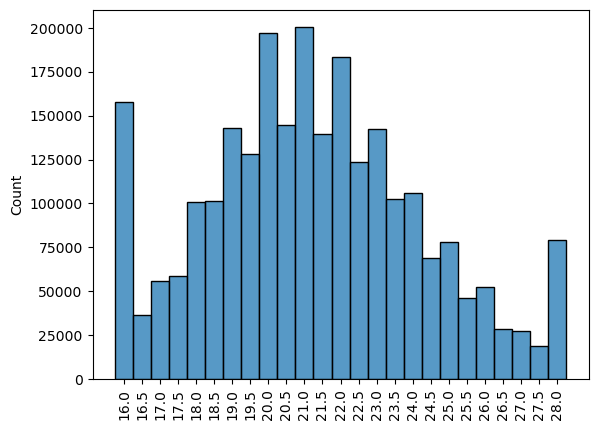

In [46]:
# ticks = np.arange(16, 28.5, 0.5)
target_temps = sorted([str(temp) for temp in climate_data_2021['c_target_temp']])
sns.histplot(target_temps)
# plt.xticks(ticks)
plt.xticks(rotation=90)
plt.show()

In [47]:
# How many temperature values are there
len(sorted(climate_data_2021['c_target_temp'].unique()))

25

### Why is 16 degrees so prevalent?

In [48]:
# climate_data_2021['c_event_duration_sec'].mean(), climate_data_2021['c_event_duration_sec'].std()

In [49]:
# # calculate z-scores for each data point
# z_scores = (climate_data_2021['c_event_duration_sec'] - climate_data_2021['c_event_duration_sec'].mean()) / climate_data_2021['c_event_duration_sec'].std()

# # set a threshold and identify outliers
# threshold = 3
# not_outliers = climate_data_2021[z_scores.abs() <= threshold]

In [50]:
# not_outliers['c_event_duration_sec'].mean(), not_outliers['c_event_duration_sec'].std()

In [51]:
# climate_data_2021.columns

In [52]:
# sns.histplot(not_outliers['c_target_temp'])

In [53]:
# climate_data_2021.columns

In [54]:
# # import pandas library
# import pandas as pd

# # group by 'ID'
# grouped = climate_data_2021.groupby('c_driveid')

# # sort each group by 'Timestamp' in ascending order
# sorted_groups = [group.sort_values('c_msg_creation_timestamp') for _, group in grouped]

# # check if the first entry of each group equals to 'A'
# results = [group['c_target_temp'].iloc[0] == 16.0 for group in sorted_groups]

# # count the number of groups where the first entry equals 'A'
# num_matches = sum(results)

# # print results
# print(f'There are {num_matches} groups where the first entry equals 16.0')

In [55]:
# sorted_groups[100].shape

In [56]:
# # calculate the percentage of values that match 'value_to_check' in each group
# percentage_list = [100*sum(group['c_target_temp'] == 16.0)/len(group) for _, group in grouped]

# # create a new dataframe with the percentage of occurences
# percentage_df = pd.DataFrame({'ID': grouped.groups.keys(), 'Percentage': percentage_list})

# # print the new dataframe
# print(percentage_df)

In [57]:
# print(percentage_df[percentage_df['Percentage'] > 0]['Percentage'].tolist())

In [58]:
# values_to_check = sorted(climate_data_2021['c_target_temp'].unique())
# values_to_check

In [59]:
# value_dict = {val: [] for val in values_to_check}

In [60]:
# # calculate the percentage of value appearance in each group
# for val in values_to_check:
#    for _, group in grouped:
#        percent = 100*sum(group['c_target_temp'] == val)/len(group)
#        value_dict[val].append(percent)

# # create a new dataframe with percentage of appearances for all values of interest
# results_df = pd.DataFrame(value_dict)

# # print the new dataframe
# print(results_df)

In [61]:
# results_df

In [62]:
# results_df[results_df[28.0]>10]

In [63]:
# df_with_temp_16 = climate_data_2021[climate_data_2021['c_target_temp'] == 16.0]
# df_with_temp_16.shape, climate_data_2021.shape

In [64]:
# df_with_temp_16['c_exteriortemperature_avg_celsius'].mean(), df_with_temp_16['c_exteriortemperature_avg_celsius'].median()

In [65]:
# climate_data_2021['c_max_exteriortemperature_celsius']

In [66]:
# sns.histplot(df_with_temp_16['c_max_exteriortemperature_celsius'])

### Correlation analysis

<Axes: >

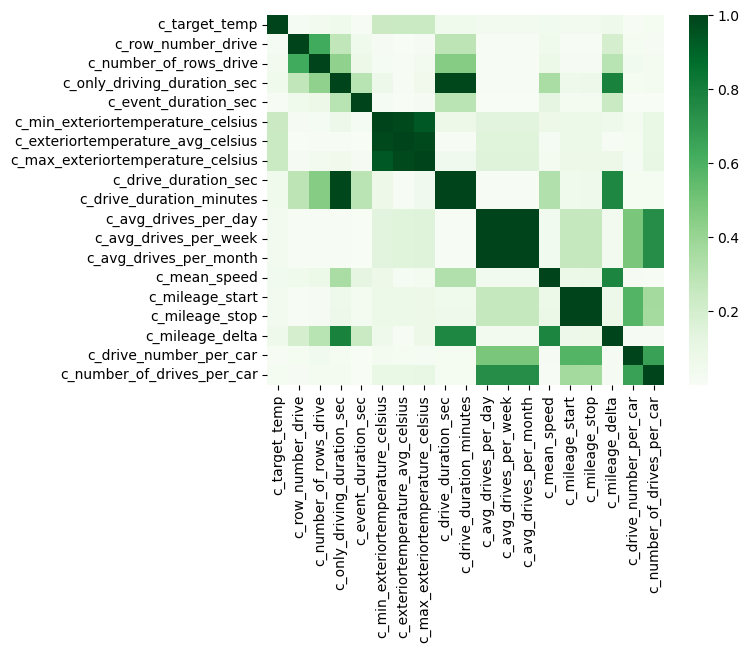

In [67]:
numerical_columns = climate_data_2021.select_dtypes(include='number').columns
correlation_matrix = climate_data_2021[numerical_columns].corr().abs()
# print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap='Greens')
# correlation_matrix

In [68]:
correlation_threshold = 0.8 # Define the correlation threshold

# Filter the correlation matrix for features with correlation above the threshold
high_correlation_features = correlation_matrix[np.abs(correlation_matrix) > correlation_threshold].stack().dropna()
high_correlation_features

c_target_temp                      c_target_temp                        1.000000
c_row_number_drive                 c_row_number_drive                   1.000000
c_number_of_rows_drive             c_number_of_rows_drive               1.000000
c_only_driving_duration_sec        c_only_driving_duration_sec          1.000000
                                   c_drive_duration_sec                 0.988903
                                   c_drive_duration_minutes             0.988903
c_event_duration_sec               c_event_duration_sec                 1.000000
c_min_exteriortemperature_celsius  c_min_exteriortemperature_celsius    1.000000
                                   c_exteriortemperature_avg_celsius    0.983202
                                   c_max_exteriortemperature_celsius    0.935504
c_exteriortemperature_avg_celsius  c_min_exteriortemperature_celsius    0.983202
                                   c_exteriortemperature_avg_celsius    1.000000
                            

#### Deletion continues

In [69]:
climate_data_2021_non_contextual = climate_data_2021.copy()

In [70]:
columns_to_drop_while_training = [
    'c_drive_duration_minutes',
    'c_number_of_rows_drive',
    'c_event_duration_sec',
    'c_year_month_day',
    'c_row_number_drive',
    'c_weekofyear_year',
    'c_avg_drives_per_day',
    'c_avg_drives_per_week',
    'c_avg_drives_per_month',
    'c_mileage_start',
    'c_mileage_stop',
    'c_mileage_delta',
    'c_drive_number_per_car',
    'c_number_of_drives_per_car',
    # 'd_diff_in_target_temp',
    'c_only_driving_duration_sec',
    'c_drive_timestamp_stop',
    'c_min_exteriortemperature_celsius',
    'c_max_exteriortemperature_celsius',
    # 'c_exteriortemperature_avg_celsius',
    'c_drive_duration_sec',
    # 'c_touchscreen_used_count',
    'c_mean_speed',
]

In [71]:
climate_data_2021.drop(columns_to_drop_while_training, axis= 1, inplace=True)
climate_data_2021.shape

(2520827, 29)

<Axes: >

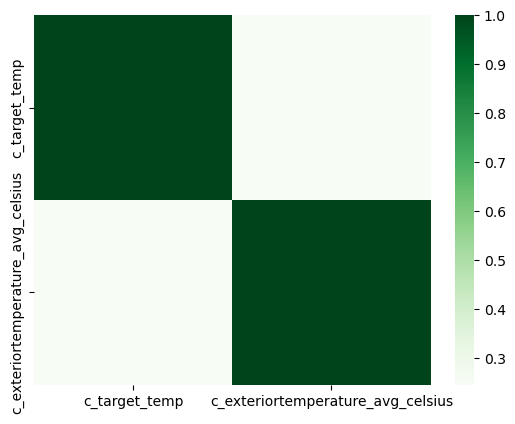

In [72]:
numerical_columns = climate_data_2021.select_dtypes(include='number').columns
correlation_matrix = climate_data_2021[numerical_columns].corr().abs()
# print(correlation_matrix)
sns.heatmap(correlation_matrix, cmap='Greens')
# correlation_matrix

In [73]:
climate_data_2021.dtypes

c_van17                               object
c_driveid                             object
c_drive_timestamp_start               object
c_msg_creation_timestamp              object
c_target_temp                        float64
c_blower_combined                     object
c_air_mode_combined                   object
c_blower_level                        object
c_blower_style                        object
c_air_dist                            object
c_auto_mode                           object
c_pwf                                 object
c_pwf_group                           object
c_exteriortemperature_avg_celsius    float64
c_drive_weekday                       object
c_weekend_drive                         bool
c_order_country                       object
c_brand                               object
c_derivat                             object
c_marketing_name                      object
c_steering_wheel_position             object
c_product_line                        object
c_fuel_typ

In [74]:
numerical_columns = climate_data_2021.select_dtypes(include='number').columns
numerical_columns.shape

(2,)

### Preprocessing of the features

In [75]:
# # Use binnning

# # Define temperature range bins
# temp_bins = [16, 18, 20, 22, 24, 26, 29]

# # Use pd.cut() function to create temperature range feature
# climate_data_2021['d_target_temp_range'] = pd.cut(climate_data_2021['c_target_temp'], bins=temp_bins, labels=[f'{x}-{x+2}' for x in temp_bins[:-1]], right=False)

# # Print the updated dataframe
# climate_data_2021[['c_target_temp', 'd_target_temp_range']]

#### One-hot encode the categorical features

In [76]:
categorical_columns = climate_data_2021.select_dtypes(include=['object']).columns.tolist()
cat_cols_excluded = ['c_van17', 'c_driveid', 'c_drive_timestamp_start', 'c_msg_creation_timestamp']
for cat_col in cat_cols_excluded:
    categorical_columns.remove(cat_col)
one_hot_cols = categorical_columns
len(one_hot_cols)

19

In [77]:
for cat_col in sorted(categorical_columns):
    print(f"{cat_col}({climate_data_2021[cat_col].nunique()}){'-'*10}> {sorted(climate_data_2021[cat_col].unique())}")

c_air_dist(10)----------> ['DEFROST', 'MAX_AC', 'MITTE', 'MITTE_S_UNTEN', 'OBEN', 'OBEN_S_MITTE', 'OBEN_S_MITTE_S_UNTEN', 'OBEN_S_UNTEN', 'OFF', 'UNTEN']
c_air_mode_combined(11)----------> ['AUTO', 'DEFROST', 'MAX_AC', 'MITTE', 'MITTE_S_UNTEN', 'OBEN', 'OBEN_S_MITTE', 'OBEN_S_MITTE_S_UNTEN', 'OBEN_S_UNTEN', 'OFF', 'UNTEN']
c_auto_mode(2)----------> ['AUTO_OFF', 'AUTO_ON']
c_blower_combined(15)----------> ['BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'BL_7', 'BL_8', 'BL_9', 'KS_1', 'KS_2', 'KS_3', 'KS_4', 'KS_5', 'Off']
c_blower_level(10)----------> ['BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'BL_7', 'BL_8', 'BL_9', 'Off']
c_blower_style(5)----------> ['KS_1', 'KS_2', 'KS_3', 'KS_4', 'KS_5']
c_brand(1)----------> ['BMW']
c_derivat(28)----------> ['F40', 'F44', 'G01', 'G02', 'G05', 'G06', 'G07', 'G08', 'G11', 'G12', 'G14', 'G15', 'G16', 'G20', 'G21', 'G22', 'G23', 'G26', 'G28', 'G29', 'G30', 'G31', 'G32', 'G38', 'G42', 'G80', 'G82', 'G83']
c_drive_weekday(7)----------> ['Fri', 'M

In [78]:
# climate_data_2021['d_climate_mode'] = climate_data_2021['c_target_temp'].astype(str) + climate_data_2021['d_climate_settings']

In [79]:
# sns.histplot(climate_data_2021['d_climate_mode'])
# plt.show()

In [80]:
# climate_data_2021['d_climate_settings'].nunique()

In [81]:
# climate_data_2021['d_climate_mode'].nunique()

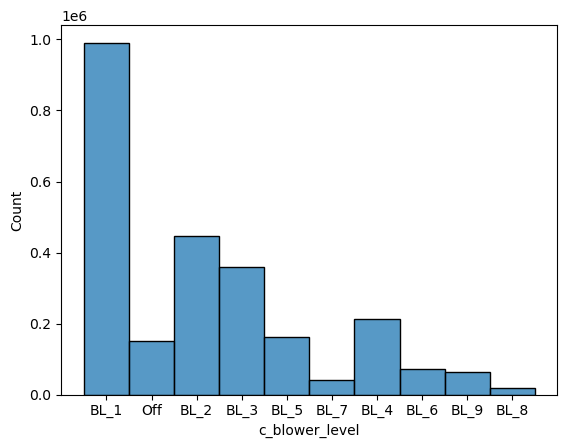

In [82]:
sns.histplot(climate_data_2021['c_blower_level'])
plt.show()

##### Whenever the c_auto_mode is ON, the c_blower_combined is exactly equal to the c_blower_style

In [83]:
auto_mode_on = climate_data_2021[climate_data_2021['c_auto_mode'] == 'AUTO_ON']
auto_mode_on.shape

(1096247, 29)

In [84]:
# !!!! IMPORTANT FINDING !!!!
(auto_mode_on['c_blower_style'] == auto_mode_on['c_blower_combined']).sum()

1096247

In [85]:
auto_mode_on['c_blower_combined'].unique()

array(['KS_1', 'KS_2', 'KS_3', 'KS_5', 'KS_4'], dtype=object)

<Axes: xlabel='c_blower_style', ylabel='Count'>

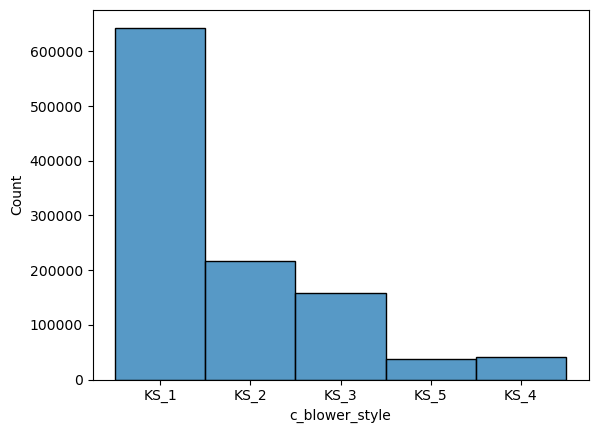

In [86]:
sns.histplot(climate_data_2021[climate_data_2021['c_auto_mode'] == 'AUTO_ON']['c_blower_style'])

In [87]:
auto_mode_off = climate_data_2021[climate_data_2021['c_auto_mode'] == 'AUTO_OFF']
auto_mode_off.shape

(1424580, 29)

In [88]:
auto_mode_off.shape

(1424580, 29)

##### Whenever the c_auto_mode is OFF then if the c_blower_level is Off, c_blower_combined will also be OFF

In [89]:
auto_mode_off[auto_mode_off['c_blower_level'] == 'Off']['c_blower_combined'].unique()

array(['Off'], dtype=object)

<b>
c_auto_mode ON: c_blower_combined = c_blower_style <br>
c_auto_mode OFF: c_blower_combined = c_blower_level = OFF
</b>

1. Whenever the c_auto_mode is on, the c_blower_combined value will be set to KS_x[1:5]
2. 

In [90]:
auto_mode_off[auto_mode_off['c_blower_level'] == 'Off']['c_blower_combined']

2422493    Off
1690968    Off
683945     Off
1194055    Off
1194056    Off
          ... 
1033051    Off
1397947    Off
1397949    Off
93318      Off
2374479    Off
Name: c_blower_combined, Length: 123003, dtype: object

In [91]:
auto_mode_off[blower_specific_features]['c_blower_combined'].unique()

array(['BL_1', 'Off', 'BL_2', 'BL_3', 'BL_5', 'BL_7', 'BL_4', 'BL_6',
       'BL_9', 'BL_8'], dtype=object)

##### Merge the c_auto_mode and c_blower_combined together

In [92]:
# climate_data_2021['d_climate_settings'] = climate_data_2021['c_auto_mode'] + "_" + climate_data_2021['c_blower_combined'].apply(lambda x: x.upper())

In [93]:
# climate_data_2021['d_climate_settings'].unique()

In [94]:
# # See the disttribution
# sns.histplot(climate_data_2021['d_climate_settings'])
# plt.xticks(rotation=90)
# plt.show()

In [95]:
climate_data_2021['c_air_mode_combined']

742366      AUTO
742367      AUTO
742368      AUTO
742369     UNTEN
742370      AUTO
           ...  
1438158     AUTO
1438159     AUTO
1438160     AUTO
1438161     AUTO
1438162     AUTO
Name: c_air_mode_combined, Length: 2520827, dtype: object

In [96]:
climate_data_2021[climate_data_2021['c_air_dist'] != climate_data_2021['c_air_mode_combined']][['c_air_dist', 'c_air_mode_combined']]

,c_air_dist,c_air_mode_combined
742366,UNTEN,AUTO
742367,UNTEN,AUTO
742368,UNTEN,AUTO
742370,UNTEN,AUTO
742371,UNTEN,AUTO
...,...,...
1438158,MITTE,AUTO
1438159,MITTE,AUTO
1438160,MITTE,AUTO
1438161,MITTE,AUTO


In [97]:
sorted(climate_data_2021['c_air_dist'].unique()), sorted(climate_data_2021['c_air_mode_combined'].unique())

(['DEFROST',
  'MAX_AC',
  'MITTE',
  'MITTE_S_UNTEN',
  'OBEN',
  'OBEN_S_MITTE',
  'OBEN_S_MITTE_S_UNTEN',
  'OBEN_S_UNTEN',
  'OFF',
  'UNTEN'],
 ['AUTO',
  'DEFROST',
  'MAX_AC',
  'MITTE',
  'MITTE_S_UNTEN',
  'OBEN',
  'OBEN_S_MITTE',
  'OBEN_S_MITTE_S_UNTEN',
  'OBEN_S_UNTEN',
  'OFF',
  'UNTEN'])

In [98]:
more_cols_to_drop = [
    'c_derivat',
    'c_brand',
    'c_order_country',
    'c_marketing_name',
    'c_steering_wheel_position',
    'c_product_line',
    'c_fuel_type_corrected_description',
    'c_vehicle_class',
    'c_script_version',
    'c_gcad',
    # 'c_air_dist',
    'c_blower_combined',
    # 'c_blower_style',
    # 'c_blower_level',
    'c_pwf',
    # 'c_air_mode_combined',
    'c_is_guest_profile',
    'c_is_active_profile',
    # 'c_auto_mode',
    'c_weekend_drive',
    'c_touchscreen_used',
    'c_drive_weekday',
    'c_pwf_group',
]

In [99]:
climate_data_2021.columns

Index(['c_van17', 'c_driveid', 'c_drive_timestamp_start',
       'c_msg_creation_timestamp', 'c_target_temp', 'c_blower_combined',
       'c_air_mode_combined', 'c_blower_level', 'c_blower_style', 'c_air_dist',
       'c_auto_mode', 'c_pwf', 'c_pwf_group',
       'c_exteriortemperature_avg_celsius', 'c_drive_weekday',
       'c_weekend_drive', 'c_order_country', 'c_brand', 'c_derivat',
       'c_marketing_name', 'c_steering_wheel_position', 'c_product_line',
       'c_fuel_type_corrected_description', 'c_vehicle_class',
       'c_script_version', 'c_gcad', 'c_is_active_profile',
       'c_is_guest_profile', 'c_touchscreen_used'],
      dtype='object')

In [100]:
climate_data_2021.drop(more_cols_to_drop, axis=1, inplace=True)
climate_data_2021.shape

(2520827, 11)

In [101]:
contextual_features = climate_data_2021.columns

In [102]:
categorical_columns = climate_data_2021.select_dtypes(include=['object']).columns.tolist()
cat_cols_excluded = ['c_van17', 'c_driveid', 'c_drive_timestamp_start', 'c_msg_creation_timestamp']
for cat_col in cat_cols_excluded:
    categorical_columns.remove(cat_col)
one_hot_cols = categorical_columns
len(one_hot_cols)

5

In [103]:
climate_data_2021[one_hot_cols].head()

,c_air_mode_combined,c_blower_level,c_blower_style,c_air_dist,c_auto_mode
742366,AUTO,BL_1,KS_1,UNTEN,AUTO_ON
742367,AUTO,BL_1,KS_1,UNTEN,AUTO_ON
742368,AUTO,BL_1,KS_1,UNTEN,AUTO_ON
742369,UNTEN,BL_1,KS_1,UNTEN,AUTO_OFF
742370,AUTO,BL_1,KS_1,UNTEN,AUTO_ON


In [104]:
climate_data_2021 = pd.get_dummies(climate_data_2021, columns=one_hot_cols)
climate_data_2021.shape

(2520827, 44)

##### Convert the bool cols to int 0/1

In [105]:
bool_columns = climate_data_2021.select_dtypes(include=['bool']).columns
climate_data_2021[bool_columns] = climate_data_2021[bool_columns].astype('int')
climate_data_2021.shape

(2520827, 44)

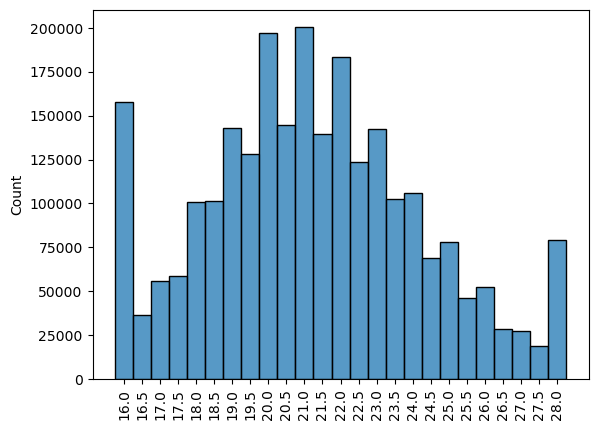

In [106]:
target_temps = sorted(np.array([str(temp) for temp in climate_data_2021['c_target_temp']]))
sns.histplot(target_temps)
plt.xticks(rotation=90)
plt.show()

### Calculate the correlation again

In [107]:
climate_data_2021.head()

,c_van17,c_driveid,c_drive_timestamp_start,c_msg_creation_timestamp,c_target_temp,c_exteriortemperature_avg_celsius,c_air_mode_combined_AUTO,c_air_mode_combined_DEFROST,c_air_mode_combined_MAX_AC,c_air_mode_combined_MITTE,c_air_mode_combined_MITTE_S_UNTEN,c_air_mode_combined_OBEN,c_air_mode_combined_OBEN_S_MITTE,c_air_mode_combined_OBEN_S_MITTE_S_UNTEN,c_air_mode_combined_OBEN_S_UNTEN,c_air_mode_combined_OFF,c_air_mode_combined_UNTEN,c_blower_level_BL_1,c_blower_level_BL_2,c_blower_level_BL_3,c_blower_level_BL_4,c_blower_level_BL_5,c_blower_level_BL_6,c_blower_level_BL_7,c_blower_level_BL_8,c_blower_level_BL_9,c_blower_level_Off,c_blower_style_KS_1,c_blower_style_KS_2,c_blower_style_KS_3,c_blower_style_KS_4,c_blower_style_KS_5,c_air_dist_DEFROST,c_air_dist_MAX_AC,c_air_dist_MITTE,c_air_dist_MITTE_S_UNTEN,c_air_dist_OBEN,c_air_dist_OBEN_S_MITTE,c_air_dist_OBEN_S_MITTE_S_UNTEN,c_air_dist_OBEN_S_UNTEN,c_air_dist_OFF,c_air_dist_UNTEN,c_auto_mode_AUTO_OFF,c_auto_mode_AUTO_ON
742366,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:03:39.287,23.5,3.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
742367,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:03:55.317,26.0,3.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
742368,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:07:05.541,21.0,3.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
742369,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:18:39.969,25.0,3.25,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
742370,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:19:36.384,25.0,3.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


<Axes: >

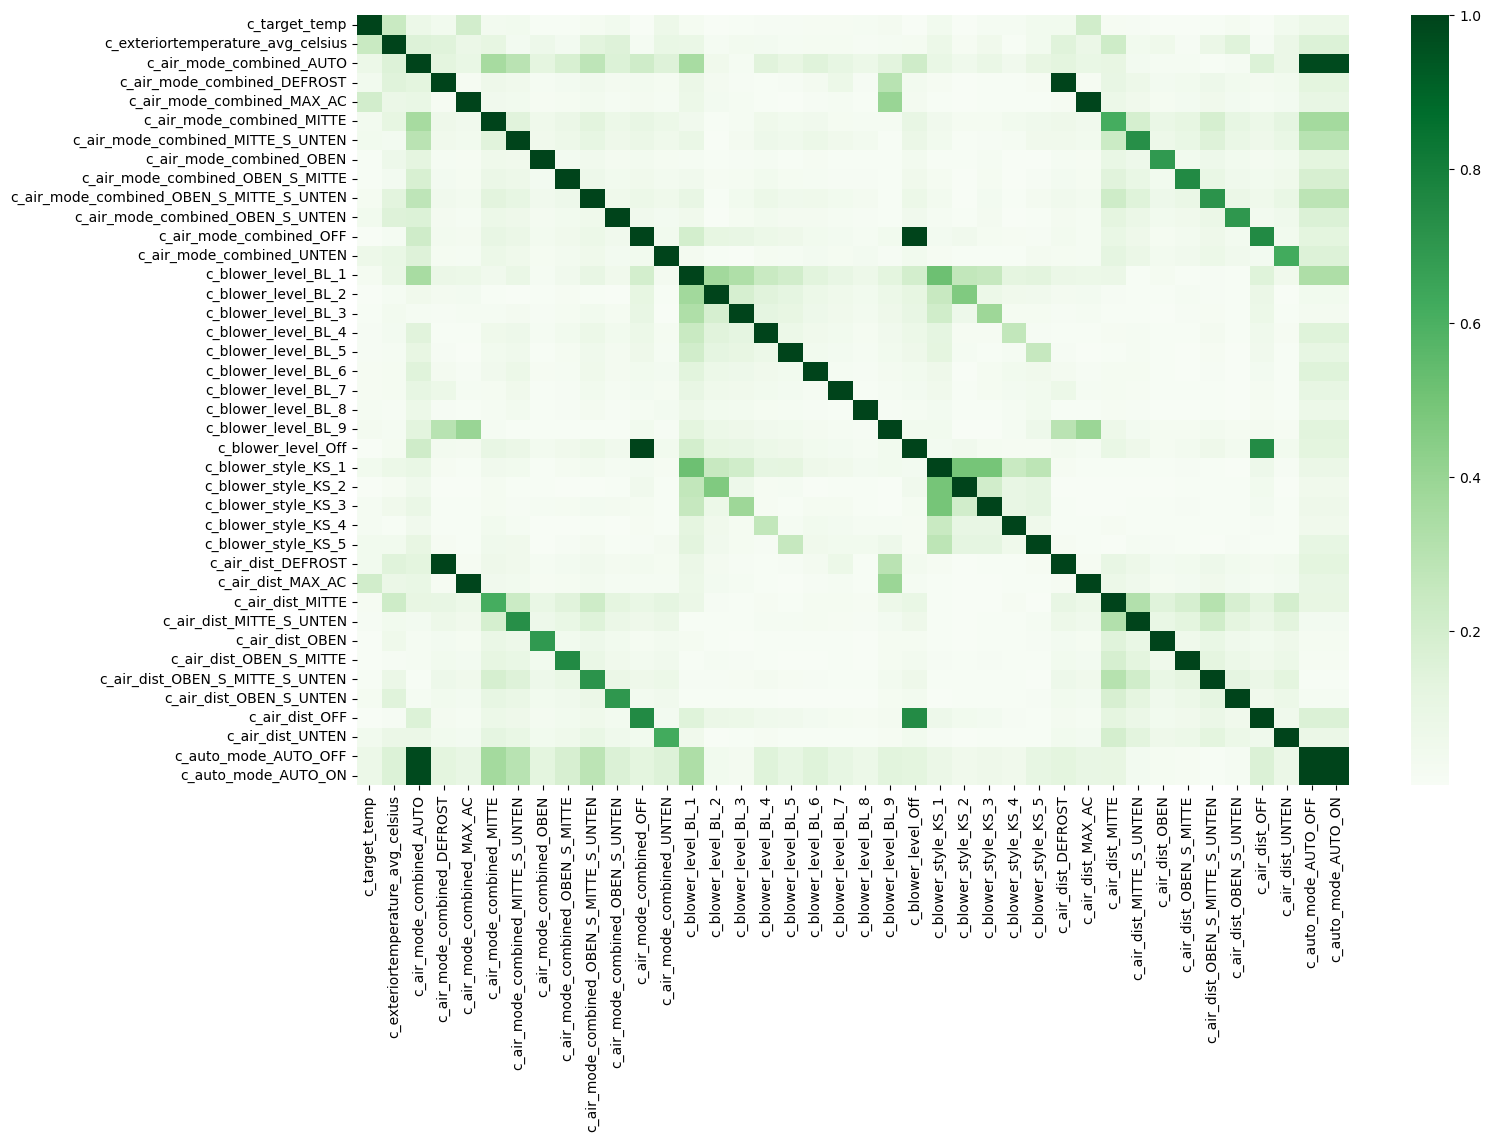

In [108]:
columns = climate_data_2021.select_dtypes(include='number').columns
correlation_matrix = climate_data_2021[columns].corr().abs()
# print(correlation_matrix)
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, cmap='Greens')
# correlation_matrix

In [109]:
correlation_threshold = 0.8 # Define the correlation threshold

# Filter the correlation matrix for features with correlation above the threshold
high_correlation_features = correlation_matrix[np.abs(correlation_matrix) > correlation_threshold].stack().dropna()
high_correlation_features

c_target_temp                             c_target_temp                               1.000000
c_exteriortemperature_avg_celsius         c_exteriortemperature_avg_celsius           1.000000
c_air_mode_combined_AUTO                  c_air_mode_combined_AUTO                    1.000000
                                          c_auto_mode_AUTO_OFF                        0.978323
                                          c_auto_mode_AUTO_ON                         0.978323
c_air_mode_combined_DEFROST               c_air_mode_combined_DEFROST                 1.000000
                                          c_air_dist_DEFROST                          0.997751
c_air_mode_combined_MAX_AC                c_air_mode_combined_MAX_AC                  1.000000
                                          c_air_dist_MAX_AC                           0.992360
c_air_mode_combined_MITTE                 c_air_mode_combined_MITTE                   1.000000
c_air_mode_combined_MITTE_S_UNTEN         c_air_mo

### Now fill the events at a certain interval

##### Average event duration is 351 seconds with a very high STD of 721
The median is 88 seconds (subject to change of the dataset being used)

In [110]:
climate_data_2021 = climate_data_2021.sort_values(['c_driveid', 'c_msg_creation_timestamp'])

<Axes: xlabel='c_target_temp', ylabel='Count'>

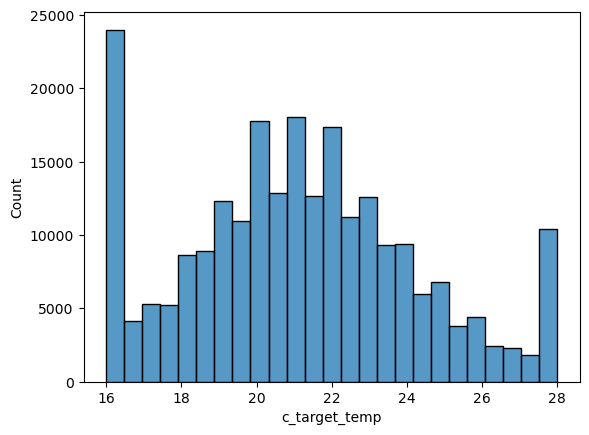

In [111]:
# Distribution of the first temp of the drives
sns.histplot(climate_data_2021.groupby('c_driveid').first()['c_target_temp'], bins=25)

In [112]:
climate_data_2021['c_msg_creation_timestamp'] = pd.to_datetime(climate_data_2021['c_msg_creation_timestamp'])

In [113]:
# selected_time_interval = 300 # seconds

In [114]:
# Filling

# from datetime import datetime, timedelta
# # Initialize an empty list to store new rows
# new_rows = []

# # Function to calculate new timestamps at 10-second intervals
# def generate_new_timestamps(row, next_row):
#     time_diff = (next_row['c_msg_creation_timestamp'] - row['c_msg_creation_timestamp']).total_seconds()
#     # print(f"time difference between subsequent rows: {time_diff}")
#     num_intervals = int(time_diff / selected_time_interval)
#     new_timestamps = [row['c_msg_creation_timestamp'] + timedelta(seconds=selected_time_interval * i) for i in range(1, num_intervals)]
    
#     # Ensure new timestamps do not exceed the next event's timestamp
#     new_timestamps = [ts for ts in new_timestamps if ts < next_row['c_msg_creation_timestamp']]
#     return new_timestamps

In [115]:
# chosen_driveid = climate_data_2021['c_driveid'].unique()[0]
# climate_data_2021[climate_data_2021['c_driveid'] == chosen_driveid]

In [116]:
# from tqdm import tqdm
# # Iterate through groups (each group is a visit)
# for _, group in tqdm(climate_data_2021.groupby('c_driveid')):
#     group = group.reset_index(drop=True)
    
#     # Iterate through the rows within the group to fill gaps
#     for i in range(len(group) - 1):
#         current_row = group.iloc[i]
#         next_row = group.iloc[i + 1]
        
#         new_rows.append(current_row.to_dict())
        
#         # Generate new timestamps at 10-second intervals
#         new_timestamps = generate_new_timestamps(current_row, next_row)
#         for new_timestamp in new_timestamps:
#             new_row = current_row.copy()
#             new_row['c_msg_creation_timestamp'] = new_timestamp
#             new_rows.append(new_row.to_dict())
    
#     # Add the last row in the group
#     new_rows.append(group.iloc[-1].to_dict())

In [117]:
# len(new_rows)

In [118]:
# import pickle

# with open('../data/climate_data_2021_only_fahren_3571_drives_only_climate_features_and_temp_change_at_each_step_events_at_180_seconds_interval.pkl', 'wb') as f:
#     pickle.dump(new_rows, f)

In [119]:
# import pickle

# with open('../data/climate_data_2021_with_filled_events_at_60_seconds_interval.pkl', 'rb') as f:
#     new_rows = pickle.load(f)

In [120]:
# # Create a new dataframe with the filled gaps
# climate_data_2021 = pd.DataFrame(new_rows)

# # print(new_df)
# climate_data_2021.shape

In [121]:
# climate_data_2021.to_csv(f'../data/climate_data_2021_only_fahren_3571_drives_only_climate_features_events_at_180_seconds_interval.csv')

### Feature creation

#### Personalized features using VAE

In [122]:
climate_data_2021

,c_van17,c_driveid,c_drive_timestamp_start,c_msg_creation_timestamp,c_target_temp,c_exteriortemperature_avg_celsius,c_air_mode_combined_AUTO,c_air_mode_combined_DEFROST,c_air_mode_combined_MAX_AC,c_air_mode_combined_MITTE,c_air_mode_combined_MITTE_S_UNTEN,c_air_mode_combined_OBEN,c_air_mode_combined_OBEN_S_MITTE,c_air_mode_combined_OBEN_S_MITTE_S_UNTEN,c_air_mode_combined_OBEN_S_UNTEN,c_air_mode_combined_OFF,c_air_mode_combined_UNTEN,c_blower_level_BL_1,c_blower_level_BL_2,c_blower_level_BL_3,c_blower_level_BL_4,c_blower_level_BL_5,c_blower_level_BL_6,c_blower_level_BL_7,c_blower_level_BL_8,c_blower_level_BL_9,c_blower_level_Off,c_blower_style_KS_1,c_blower_style_KS_2,c_blower_style_KS_3,c_blower_style_KS_4,c_blower_style_KS_5,c_air_dist_DEFROST,c_air_dist_MAX_AC,c_air_dist_MITTE,c_air_dist_MITTE_S_UNTEN,c_air_dist_OBEN,c_air_dist_OBEN_S_MITTE,c_air_dist_OBEN_S_MITTE_S_UNTEN,c_air_dist_OBEN_S_UNTEN,c_air_dist_OFF,c_air_dist_UNTEN,c_auto_mode_AUTO_OFF,c_auto_mode_AUTO_ON
885076,AAJX3Pz0rJGVk6jUNIgFmmYSHyn9A2ItiSO8SJ/Vo9kL2C...,00038C3DFNQ0YR7XU,2021-11-21 22:20:47.880,2021-11-21 22:20:48.784,21.0,-1.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
885077,AAJX3Pz0rJGVk6jUNIgFmmYSHyn9A2ItiSO8SJ/Vo9kL2C...,00038C3DFNQ0YR7XU,2021-11-21 22:20:47.880,2021-11-21 22:20:49.519,21.0,-1.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
885078,AAJX3Pz0rJGVk6jUNIgFmmYSHyn9A2ItiSO8SJ/Vo9kL2C...,00038C3DFNQ0YR7XU,2021-11-21 22:20:47.880,2021-11-21 22:21:48.014,22.0,-1.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
885079,AAJX3Pz0rJGVk6jUNIgFmmYSHyn9A2ItiSO8SJ/Vo9kL2C...,00038C3DFNQ0YR7XU,2021-11-21 22:20:47.880,2021-11-21 22:47:48.376,21.0,-1.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
885080,AAJX3Pz0rJGVk6jUNIgFmmYSHyn9A2ItiSO8SJ/Vo9kL2C...,00038C3DFNQ0YR7XU,2021-11-21 22:20:47.880,2021-11-21 22:52:12.360,25.0,-1.25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739737,AAKyVo59H43loKh6s6qQiAgBbNs/Eyy5ag+2Q1VcFhUxPO...,ZZZYC5NXRZQN8XUGV,2021-08-15 13:03:41.135,2021-08-15 15:05:42.416,18.0,26.75,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
739738,AAKyVo59H43loKh6s6qQiAgBbNs/Eyy5ag+2Q1VcFhUxPO...,ZZZYC5NXRZQN8XUGV,2021-08-15 13:03:41.135,2021-08-15 15:32:00.531,19.5,26.75,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
739739,AAKyVo59H43loKh6s6qQiAgBbNs/Eyy5ag+2Q1VcFhUxPO...,ZZZYC5NXRZQN8XUGV,2021-08-15 13:03:41.135,2021-08-15 15:33:15.432,20.0,26.75,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
739740,AAKyVo59H43loKh6s6qQiAgBbNs/Eyy5ag+2Q1VcFhUxPO...,ZZZYC5NXRZQN8XUGV,2021-08-15 13:03:41.135,2021-08-15 15:35:30.561,21.0,26.75,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [123]:
non_contextual_features = [
    # 'c_drive_duration_minutes',
    'c_van17',
    'c_driveid',
    'c_drive_timestamp_start',
    'c_msg_creation_timestamp',
    'c_number_of_rows_drive',
    'c_event_duration_sec',
    #  'c_year_month_day',
    #  'c_row_number_drive',
    'c_weekofyear_year',
    'c_avg_drives_per_day',
    #  'c_avg_drives_per_week',
    #  'c_avg_drives_per_month',
    'c_mileage_start',
    #  'c_mileage_stop',
    'c_mileage_delta',
    'c_drive_number_per_car',
    'c_number_of_drives_per_car',
    'c_only_driving_duration_sec',
    #  'c_drive_timestamp_stop',
    #  'c_min_exteriortemperature_celsius',
    #  'c_max_exteriortemperature_celsius',
    #  'c_drive_duration_sec',
    'c_mean_speed',
    'c_derivat',
    #  'c_brand',
    'c_order_country',
    'c_marketing_name',
    'c_steering_wheel_position',
    'c_product_line',
    'c_fuel_type_corrected_description',
    'c_vehicle_class',
    #  'c_script_version',
    'c_gcad',
    #  'c_blower_combined',
    #  'c_pwf',
    'c_is_guest_profile',
    'c_is_active_profile',
    #  'c_weekend_drive',
    'c_touchscreen_used',
    'c_drive_weekday',
    #  'c_pwf_group',
 ]
len(non_contextual_features)

26

In [124]:
climate_data_2021_non_contextual = climate_data_2021_non_contextual[non_contextual_features]
climate_data_2021_non_contextual

,c_van17,c_driveid,c_drive_timestamp_start,c_msg_creation_timestamp,c_number_of_rows_drive,c_event_duration_sec,c_weekofyear_year,c_avg_drives_per_day,c_mileage_start,c_mileage_delta,c_drive_number_per_car,c_number_of_drives_per_car,c_only_driving_duration_sec,c_mean_speed,c_derivat,c_order_country,c_marketing_name,c_steering_wheel_position,c_product_line,c_fuel_type_corrected_description,c_vehicle_class,c_gcad,c_is_guest_profile,c_is_active_profile,c_touchscreen_used,c_drive_weekday
742366,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:03:39.287,14,16,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742367,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:03:55.317,14,190,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742368,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:07:05.541,14,694,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742369,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:18:39.969,14,57,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742370,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:19:36.384,14,1235,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438158,AAPzyykIRO1TyHH68oy6hwySxc1g7kXJQttexlHWALiWMq...,WYT4HJGA8LQ79YKK6,2021-06-25 06:39:55.320,2021-06-25 07:04:12.073,12,1365,25_2021,0.52,243.15,173.75,4,297,12088,51.61,G07,KR,X7 xDrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,False,False,True,Fri
1438159,AAPzyykIRO1TyHH68oy6hwySxc1g7kXJQttexlHWALiWMq...,WYT4HJGA8LQ79YKK6,2021-06-25 06:39:55.320,2021-06-25 07:26:57.642,12,567,25_2021,0.52,243.15,173.75,4,297,12088,51.61,G07,KR,X7 xDrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,False,False,True,Fri
1438160,AAPzyykIRO1TyHH68oy6hwySxc1g7kXJQttexlHWALiWMq...,WYT4HJGA8LQ79YKK6,2021-06-25 06:39:55.320,2021-06-25 07:36:24.816,12,3231,25_2021,0.52,243.15,173.75,4,297,12088,51.61,G07,KR,X7 xDrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,False,False,True,Fri
1438161,AAPzyykIRO1TyHH68oy6hwySxc1g7kXJQttexlHWALiWMq...,WYT4HJGA8LQ79YKK6,2021-06-25 06:39:55.320,2021-06-25 08:30:15.395,12,2300,25_2021,0.52,243.15,173.75,4,297,12088,51.61,G07,KR,X7 xDrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,False,False,True,Fri


In [125]:
a_van_id = climate_data_2021_non_contextual['c_van17'].unique()[0]
climate_data_2021_non_contextual[climate_data_2021_non_contextual['c_van17'] == a_van_id]

,c_van17,c_driveid,c_drive_timestamp_start,c_msg_creation_timestamp,c_number_of_rows_drive,c_event_duration_sec,c_weekofyear_year,c_avg_drives_per_day,c_mileage_start,c_mileage_delta,c_drive_number_per_car,c_number_of_drives_per_car,c_only_driving_duration_sec,c_mean_speed,c_derivat,c_order_country,c_marketing_name,c_steering_wheel_position,c_product_line,c_fuel_type_corrected_description,c_vehicle_class,c_gcad,c_is_guest_profile,c_is_active_profile,c_touchscreen_used,c_drive_weekday
742366,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:03:39.287,14,16,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742367,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:03:55.317,14,190,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742368,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:07:05.541,14,694,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742369,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:18:39.969,14,57,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742370,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:19:36.384,14,1235,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742371,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 19:40:11.685,14,1334,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742372,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 20:02:25.772,14,1927,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742373,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 20:34:32.731,14,106,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742374,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 20:36:18.630,14,129,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed
742375,AAI+2fTBJmO80BADI/MejJWpCN97vzg2/hbaR8eBqcDiNl...,3W8BSWAN25QWHJKF8,2021-12-01 19:03:34.020,2021-12-01 20:38:27.126,14,602,48_2021,1.81,8037.10,172.00,357,403,6806,90.53,G05,GB,X5 xDrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,True,False,True,Wed


In [126]:
climate_data_2021_non_contextual['c_weekofyear'] = climate_data_2021_non_contextual['c_weekofyear_year'].apply(lambda x: x.split('_')[0])

climate_data_2021_non_contextual['c_weekofyear'] = climate_data_2021_non_contextual['c_weekofyear'].astype('uint8')
climate_data_2021_non_contextual.drop('c_weekofyear_year', axis=1, inplace=True)

In [127]:
# TODO: convert to lowercase one of the columns: have tp find out the column
climate_data_2021_non_contextual['c_marketing_name'] = climate_data_2021_non_contextual['c_marketing_name'].apply(lambda x: x.lower())

##### VAE

In [128]:
# sort the dataset according to timestamp and also drive_number
climate_data_2021_non_contextual = climate_data_2021_non_contextual.sort_values(by=['c_van17', 'c_driveid', 'c_drive_number_per_car'])

In [129]:
categorical_columns = climate_data_2021_non_contextual.select_dtypes(include=['object']).columns.tolist()
cat_cols_excluded = ['c_van17', 'c_driveid', 'c_drive_timestamp_start', 'c_msg_creation_timestamp']
for cat_col in cat_cols_excluded:
    categorical_columns.remove(cat_col)
one_hot_cols = categorical_columns
len(one_hot_cols)


9

In [130]:
climate_data_2021_non_contextual[one_hot_cols]

,c_derivat,c_order_country,c_marketing_name,c_steering_wheel_position,c_product_line,c_fuel_type_corrected_description,c_vehicle_class,c_gcad,c_drive_weekday
742366,G05,GB,x5 xdrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,Wed
742367,G05,GB,x5 xdrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,Wed
742368,G05,GB,x5 xdrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,Wed
742369,G05,GB,x5 xdrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,Wed
742370,G05,GB,x5 xdrive45e,RL,LG,Gasoline and electro,MKL+,GUEST_PROFILE,Wed
...,...,...,...,...,...,...,...,...,...
1438158,G07,KR,x7 xdrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,Fri
1438159,G07,KR,x7 xdrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,Fri
1438160,G07,KR,x7 xdrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,Fri
1438161,G07,KR,x7 xdrive40i,LL,LG,petrol,GKL+,NOT VALID GCAD,Fri


In [131]:
climate_data_2021_non_contextual = pd.get_dummies(climate_data_2021_non_contextual, columns=one_hot_cols)
climate_data_2021_non_contextual.shape

(2520827, 271)

In [132]:
# Convert the bool cols into 0/1 values
bool_columns = climate_data_2021_non_contextual.select_dtypes(include=['bool']).columns
climate_data_2021_non_contextual[bool_columns] = climate_data_2021_non_contextual[bool_columns].astype('int')
climate_data_2021_non_contextual.shape

(2520827, 271)

In [133]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import numpy as np
import torch.optim as optim
import time
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import os
# import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

#### VAE - second approach

In [134]:
# # a_sample_drive_id = climate_data_2021_non_contextual['c_driveid'].unique()[10100]
# # a_sample_vanid = climate_data_2021_non_contextual['c_van17'].unique()[2]

# a_sample_vanid = id_of_the_van_with_most_drives
# a_sample_df = climate_data_2021_non_contextual[climate_data_2021_non_contextual['c_van17'] == a_sample_vanid]
# print(a_sample_df.shape)

# van_id = a_sample_df['c_van17'].unique()[0]
# observations_df = a_sample_df.drop(['c_driveid', 'c_van17', 'c_msg_creation_timestamp', 'c_drive_timestamp_start'], axis=1).astype('float32')
# observations = torch.from_numpy(observations_df.values)

# # data = observations.reshape(1, -1)
# van_data = observations
# van_data.shape

In [135]:
class VariationalEncoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VariationalEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(128, latent_dim)
        self.fc_logvar = nn.Linear(128, latent_dim)
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        return z, mu, logvar
    
class Decoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
        )

    def forward(self, z):
        reconstructed_x = self.decoder(z)
        return reconstructed_x
    
    
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = VariationalEncoder(input_dim, latent_dim)
        self.decoder = Decoder(input_dim, latent_dim)

    def forward(self, x):
        z, mu, logvar = self.encoder(x)
        reconstructed_x = self.decoder(z)
        return reconstructed_x, mu, logvar
    
# Define the loss function (ELBO loss)
def loss_function(reconstructed_x, x, mu, logvar):
    # BCE = nn.functional.binary_cross_entropy(reconstructed_x, x, reduction='sum')  # For binary data
    MSE = nn.functional.mse_loss(reconstructed_x, x)  # For real-valued data
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

In [136]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader
# # from torchvision import datasets, transforms

# # Define the VAE architecture
# class VAE(nn.Module):
#     def __init__(self, input_dim, latent_dim):
#         super(VAE, self).__init__()
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 256),
#             nn.ReLU(),
#             nn.Linear(256, 128),
#             nn.ReLU()
#         )
#         self.fc_mu = nn.Linear(128, latent_dim)
#         self.fc_logvar = nn.Linear(128, latent_dim)
#         # self.decoder = nn.Sequential(
#         #     nn.Linear(latent_dim, 128),
#         #     nn.ReLU(),
#         #     nn.Linear(128, 256),
#         #     nn.ReLU(),
#         #     nn.Linear(256, input_dim),
#         #     # nn.Sigmoid()  # For binary data, use Sigmoid; for real-valued data, omit this
#         # )
        
#         self.decoder_fc1 = nn.Linear(latent_dim, 128)
#         self.decoder_fc2 = nn.Linear(128, 256)
#         self.decoder_fc3 = nn.Linear(256, input_dim)

#     def reparameterize(self, mu, logvar):
#         std = torch.exp(0.5 * logvar)
#         eps = torch.randn_like(std)
#         return mu + eps * std

#     def forward(self, x):
#         x = self.encoder(x)
#         mu = self.fc_mu(x)
#         logvar = self.fc_logvar(x)
#         z = self.reparameterize(mu, logvar)
        
#         # print(f"z: {z}")
#         # print(f"nan in z: {torch.isnan(z).sum()}")
        
#         # decoder part
#         decode_z = F.relu(self.decoder_fc1(z))
#         # print(f"first decode step: {decode_z}")
#         decode_z = F.relu(self.decoder_fc2(decode_z))
#         reconstructed_x = self.decoder_fc3(decode_z)
        
        
#         # reconstructed_x = self.decoder(z)
#         # print(f"reconstructed_x: {reconstructed_x}")
#         # print(f"Nan in reconstructed_x: {torch.isnan(reconstructed_x).sum()}")
#         return reconstructed_x, z, mu, logvar

# # Define the loss function (ELBO loss)
# def loss_function(reconstructed_x, x, mu, logvar):
#     # BCE = nn.functional.binary_cross_entropy(reconstructed_x, x, reduction='sum')  # For binary data
#     MSE = nn.functional.mse_loss(reconstructed_x, x)  # For real-valued data
#     KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
#     return MSE + KLD


In [137]:
# # Hyperparameters
# input_dim = van_data.shape[1] # Example for MNIST data
# latent_dim = 20
# learning_rate = 1e-3
# batch_size = 64
# epochs = 10


# print(f"input_dim: {input_dim}")
# # Initialize the VAE and optimizer
# vae = VAE(input_dim, latent_dim)
# optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

In [138]:
# from sklearn.preprocessing import StandardScaler
# # create StandardScaler object
# scaler = StandardScaler()

# # fit and transform the data
# scaled_data = scaler.fit_transform(van_data).astype('float32')
# scaled_data.dtype

In [139]:
# # # Load the dataset (MNIST in this case)
# # transform = transforms.Compose([transforms.ToTensor()])
# # train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# # train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# from torch.utils.data import DataLoader, TensorDataset


# # Create a TensorDataset and DataLoader
# # custom_dataset = TensorDataset(data)
# train_loader = DataLoader(scaled_data, batch_size=batch_size, shuffle=True)

In [140]:
# # Training loop
# import time

# start = time.time()
# vae.train()
# losses = []
# for epoch in range(epochs):
#     for batch_idx, data in enumerate(train_loader):
#         # print(data.shape)
#         data = data.to('cpu')  # Move data to the device (e.g., GPU)
#         optimizer.zero_grad()
#         reconstructed_x, mu, logvar = vae(data)
#         loss = loss_function(reconstructed_x, data, mu, logvar)
#         # print(f"loss: {loss}")
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.cpu().item())
#         if batch_idx % 100 == 0:
#             print(f"Epoch [{epoch+1}/{epochs}] Batch [{batch_idx}/{len(train_loader)}] Loss: {loss.item():.4f}")
# end = time.time()

# print(f"time required: {(end-start):.2f} seconds")

In [141]:
# vae.encoder.eval()
# z, _, _ = vae.encoder(torch.from_numpy(scaled_data))
# torch.sum(z, dim=0)

In [142]:
def train_vae(vae, train_loader, optimizer, epochs):
   start = time.time()
   vae.train()
#    losses = []
   for epoch in range(epochs):
      for batch_idx, data in enumerate(train_loader):
         # print(data.shape)
         data = data.to('cpu')  # Move data to the device (e.g., GPU)
         optimizer.zero_grad()
         reconstructed_x, mu, logvar = vae(data)
         loss = loss_function(reconstructed_x, data, mu, logvar)
         loss.backward()
         optimizer.step()
        #  losses.append(loss.cpu().item())
         # if batch_idx % 100 == 0:
         #       print(f"Epoch [{epoch+1}/{epochs}] Batch [{batch_idx}/{len(train_loader)}] Loss: {loss.item():.4f}")
   end = time.time()
   # print(f"time required: {(end-start):.2f} seconds")

### Produce vehicle specific embeddings using VAE

In [143]:
# orig_vid_to_custom_vid = {}
# custom_vid_to_orig_vid = {}

# van_ids = climate_data_2021_non_contextual['c_van17'].unique()

# for (i, vid) in enumerate(van_ids):
#     orig_vid_to_custom_vid[vid] = f"van_{i}"
#     custom_vid_to_orig_vid[f"van_{i}"] = vid

In [144]:
# groups = climate_data_2021_non_contextual.groupby('c_van17')
# latent_dim = 32
# learning_rate = 1e-3
# batch_size = 64

# model_save_path = "/home/q621464/Desktop/Thesis/code/mlp-master-thesis-personalization/personalized-smart-climate/models"
# vehicle_specific_embeddings = {}
# for group_id, group_df in tqdm(groups):
#    van_id = group_df['c_van17'].unique()[0]
#    custom_vid = orig_vid_to_custom_vid[van_id]
   
#    observations_df = group_df.drop(['c_driveid', 'c_van17', 'c_msg_creation_timestamp', 'c_drive_timestamp_start'], axis=1).astype('float32')
#    observations = torch.from_numpy(observations_df.values)
#    van_data = observations
   
#    # Scale the datapoints
#    scaler = StandardScaler()
#    scaled_data = scaler.fit_transform(van_data).astype('float32')
   
#    # Instantiate the VAE
#    input_dim = scaled_data.shape[1]
#    vae = VAE(input_dim, latent_dim)
#    optimizer = optim.Adam(vae.parameters(), lr=learning_rate)
   
#    # Training loop
#    train_loader = DataLoader(scaled_data, batch_size=batch_size, shuffle=True)
#    train_vae(vae, train_loader, optimizer, 10)
   
#    # Store the vehicle specific vae model
#    torch.save(vae.state_dict(), f"{model_save_path}/{custom_vid}.pth")
   
#    # produce the embedding for the vehicle
#    vae.eval()
#    vae.encoder.eval()
#    z, _, _ = vae.encoder(torch.from_numpy(scaled_data))
#    vehicle_embedding = torch.sum(z, dim=0).detach().numpy()
#    vehicle_specific_embeddings[van_id] = vehicle_embedding
   

In [145]:
# import pickle
# with open(f'../data/embeddings/van_specific_embeddings.pkl', 'wb') as f:
#     pickle.dump(vehicle_specific_embeddings, f)

In [146]:
# a_sample_drive_id = climate_data_2021_non_contextual['c_driveid'].unique()[10100]
# a_sample_vanid = climate_data_2021_non_contextual['c_van17'].unique()[2]
# a_sample_df = climate_data_2021_non_contextual[climate_data_2021_non_contextual['c_van17'] == a_sample_vanid].drop(['c_driveid', 'c_van17', 'c_msg_creation_timestamp', 'c_drive_timestamp_start'], axis=1)

#### Contextual features

In [147]:
climate_data_2021['c_driveid'].value_counts().min(), climate_data_2021['c_driveid'].value_counts().max(), climate_data_2021['c_driveid'].value_counts().mean()

(5, 99, 10.556182763053757)

In [148]:
# # Now only keep those drives which have at least 15 events
# # Filter rows based on item occurrences
# k = 15
# climate_data_2021 = climate_data_2021.groupby('c_driveid').filter(lambda group: len(group) >= k)
# climate_data_2021.shape

In [149]:
# Sort the dataframe in ascending manner according to timestamp
climate_data_2021.sort_values(by=['c_van17', 'c_driveid', 'c_drive_timestamp_start', 'c_msg_creation_timestamp'], inplace=True)
climate_data_2021.shape

(2520827, 44)

In [150]:
climate_data_2021['d_drive_uid'] = climate_data_2021['c_van17'] + '_' + climate_data_2021['c_driveid']
climate_data_2021['d_drive_uid'].nunique()

238801

In [151]:
# How many drivs per car now?
climate_data_2021.groupby(['c_van17'])['c_driveid'].nunique().max()

430

In [152]:
# # Drop the van and drive id cols
# # We have already concatenated them
# climate_data_2021.drop(['c_van17', 'c_driveid'], axis=1, inplace=True)
# climate_data_2021.shape

In [153]:
climate_data_2021 = climate_data_2021.reset_index(drop=True)

In [154]:
# Introduce the rewards
# Quadratic rewards
max_temp_diff = climate_data_2021['c_target_temp'].max() - climate_data_2021['c_target_temp'].min()
max_possible_reward = 1.0
climate_data_2021['d_prev_target_temp'] = climate_data_2021.groupby('d_drive_uid')['c_target_temp'].apply(lambda x: x.shift(periods=1).fillna(x.iloc[0])).reset_index(drop=True)

climate_data_2021['d_reward'] = np.where(climate_data_2021['c_target_temp'] == climate_data_2021['d_prev_target_temp'],
                                        1,
                                        (1-(abs(climate_data_2021['c_target_temp'] - climate_data_2021['d_prev_target_temp']) / max_temp_diff) * max_possible_reward)**2)

In [155]:
# sample_drive_id = climate_data_2021['d_drive_uid'][120]

# sample_df = climate_data_2021[climate_data_2021['d_drive_uid'] == sample_drive_id]

In [156]:
# # Introduce the rewards
# # Linear rewards
# # Introduce the rewards
# # Quadratic rewards
# max_temp_diff = climate_data_2021['c_target_temp'].max() - climate_data_2021['c_target_temp'].min()
# max_possible_reward = 1.0
# climate_data_2021['d_prev_target_temp'] = climate_data_2021.groupby('d_drive_uid')['c_target_temp'].apply(lambda x: x.shift(periods=1).fillna(x.iloc[0]))

# climate_data_2021['d_reward'] = np.where(climate_data_2021['c_target_temp'] == climate_data_2021['d_prev_target_temp'],
#                                         1,
#                                         (1-(abs(climate_data_2021['c_target_temp'] - climate_data_2021['d_prev_target_temp']) / max_temp_diff) * max_possible_reward))

In [157]:
# # Introduce the rewards
# # Binary rewards
# max_temp_diff = climate_data_2021['c_target_temp'].max() - climate_data_2021['c_target_temp'].min()
# max_possible_reward = 1.0
# climate_data_2021['d_prev_target_temp'] = climate_data_2021.groupby('d_drive_uid')['c_target_temp'].apply(lambda x: x.shift(periods=1).fillna(x.iloc[0]))

# climate_data_2021['d_reward'] = np.where(climate_data_2021['c_target_temp'] == climate_data_2021['d_prev_target_temp'],
#                                         1, 0)

In [158]:
# # Save the dataframe for later use
# climate_data_2021.to_csv("../data/climate_data_2021_only_fahren_3571_drives_only_climate_features_events_at_30_seconds_interval.csv", index=False)

In [159]:
# # Important features
# top_features_rfe = ['c_min_exteriortemperature_celsius', 'c_exteriortemperature_avg_celsius', 'c_max_exteriortemperature_celsius', 'c_drive_duration_sec', 'c_weekend_drive', 'c_mean_speed', 'c_touchscreen_used_count', 'c_air_mode_combined_OFF', 'c_blower_level_BL_1', 'c_blower_level_BL_2', 'c_blower_level_BL_3', 'c_blower_level_Off', 'c_blower_style_KS_1', 'c_air_dist_MITTE', 'c_auto_mode_AUTO_ON', 'c_pwf_FAHREN', 'c_pwf_WOHNEN', 'c_pwf_group_WOHNEN', 'c_fuel_type_corrected_description_petrol', 'c_vehicle_class_KKL+']

In [160]:
# # Prepare trajectory with top features
# def prepare_trajectory(df):
#     # print(df.shape)
#     actions = np.arange(16, 28.5, 0.5)
#     # actions = np.array(['16-18', '18-20', '20-22', '22-24', '24-26', '26-28'])
    
#     custom_act_to_orig_act = {idx: action for idx, action in enumerate(actions)}
#     orig_act_to_custom_act = {action: idx for idx, action in enumerate(actions)}
    
#     target_temp = df['c_target_temp'].tolist()
#     # target_temp = df['d_target_temp_range'].tolist()
#     rewards = df['d_reward'].tolist()
#     observations = df.drop(['d_drive_uid', 'c_msg_creation_timestamp', 'c_drive_timestamp_start', 'c_target_temp', 'd_reward', 'd_prev_target_temp'], axis=1)
#     features = observations.columns
#     observations = observations.values.tolist()
    
#     # observations = df[top_features_rfe].values.tolist()
#     # print(target_temp)
#     actions = [orig_act_to_custom_act[temp] for temp in target_temp]
    
#     terminals = np.full(len(observations)-1, False, dtype=bool)
#     terminals[-1] = True  # Set the last terminal as True
    
#     next_observations = observations[1:] + [observations[-1]]
#     next_observations[-1] = np.zeros_like(next_observations[-1])  # Set the last next_observation as zeros
    
#     # rewards = np.zeros(len(observations))
    
#     trajectory = {
#         'observations': np.array(observations[:-1]),
#         'next_observations': np.array(next_observations[:-1]),
#         'actions': np.array(actions[:-1]),
#         'rewards': np.array(rewards[:-1]),
#         'terminals': terminals,
#         'features': np.array(features)
#     }

#     return trajectory

In [161]:
# # Prepare trajectories with pre-splitting of trin-test dataset
# def prepare_trajectory(df):
#     # print(df.shape)
#     actions = np.arange(16, 28.5, 0.5)
#     # actions = np.array(['16-18', '18-20', '20-22', '22-24', '24-26', '26-28'])
    
#     custom_act_to_orig_act = {idx: action for idx, action in enumerate(actions)}
#     orig_act_to_custom_act = {action: idx for idx, action in enumerate(actions)}
    
#     # target_temp_diff = (df['d_prev_target_temp'] - df['c_target_temp']).tolist()
#     # target_temp = df['d_target_temp_range'].tolist()
#     rewards = df['d_reward'].tolist()
#     observations = df.drop(['c_driveid', 'c_van17', 'd_drive_uid', 'c_msg_creation_timestamp', 'c_drive_timestamp_start', 'c_target_temp', 'd_reward', 'd_prev_target_temp'], axis=1)
#     features = observations.columns
#     targets = df['c_target_temp'].tolist()
#     observations = observations.values.tolist()
#     actions = [orig_act_to_custom_act[temp] for temp in targets]
    
#     next_observations = observations
    
    
    
#     # TODO: Uncomment the following lines if you want to split the data beforehand
#     # into train and test set by splitting each trajectory
#     # -----------------------------------------------------------------------------
#     # We will use a 70-30 split for training and testing
#     # First select the indices for training and testing
#     # test_sample_size = int(len(observations) * 0.3)
#     # indices = {i for i in range(len(observations))}
#     # test_indices = list(np.random.choice(list(indices), size=test_sample_size, replace=False))
#     # train_indices = list(indices.difference(test_indices))
#     # train_terminals = [False]*(len(train_indices)-1) + [True]
#     # test_terminals = [False]*(len(test_indices)-1) + [True]
    
#     # train_trajectory = {
#     #     'observations': np.array(observations)[train_indices],
#     #     'next_observations': np.array(next_observations)[train_indices],
#     #     'actions': np.array(actions)[train_indices],
#     #     'rewards': np.array(rewards)[train_indices],
#     #     'terminals': np.array(train_terminals),
#     #     'features': np.array(features),
#     #     'targets': np.array(targets)[train_indices],
#     # }
    
#     # test_trajectory = {
#     #     'observations': np.array(observations)[test_indices],
#     #     'next_observations': np.array(next_observations)[test_indices],
#     #     'actions': np.array(actions)[test_indices],
#     #     'rewards': np.array(rewards)[test_indices],
#     #     'terminals': np.array(test_terminals),
#     #     'features': np.array(features),
#     #     'targets': np.array(targets)[test_indices],
#     # }
#     # return train_trajectory, test_trajectory
#     # --------------------------------------------------------------------------------------------
    
#     terminals = [False]*(len(observations)-1) + [True]
#     trajectory = {
#         'observations': np.array(observations),
#         'next_observations': np.array(next_observations),
#         'actions': np.array(actions),
#         'rewards': np.array(rewards),
#         'terminals': np.array(terminals),
#         'features': np.array(features),
#         'targets': np.array(targets),
#     }

#     return trajectory

In [162]:
# def prepare_trajectory(df):
#     actions = np.arange(16, 28.5, 0.5)
#     custom_act_to_orig_act = {idx: action for idx, action in enumerate(actions)}
#     orig_act_to_custom_act = {action: idx for idx, action in enumerate(actions)}
    
#     target_temp = df['c_target_temp'].tolist()
    
#     observations = df.drop(['d_drive_uid', 'c_msg_creation_timestamp', 'c_drive_timestamp_start', 'c_target_temp'], axis=1).values.tolist()
    
#     actions = [orig_act_to_custom_act[temp] for temp in target_temp]
    
#     terminals = np.full(len(observations)-1, False, dtype=bool)
#     terminals[-1] = True  # Set the last terminal as True
    
#     next_observations = observations[1:] + [observations[-1]]
#     next_observations[-1] = np.zeros_like(next_observations[-1])  # Set the last next_observation as zeros
    
#     rewards = np.zeros(len(observations))
    
#     trajectory = {
#         'observations': np.array(observations[:-1]),
#         'next_observations': np.array(next_observations[:-1]),
#         'actions': np.array(actions[:-1]),
#         'rewards': rewards[:-1],
#         'terminals': terminals
#     }

#     return trajectory

In [163]:
# %%time
# drive_uids = climate_data_2021['d_drive_uid'].unique()
# train_trajectories = []
# from tqdm import tqdm
# for drive_uid in tqdm(drive_uids[0:1]):
#     # print(f"preocessing drive: {drive_uid}")
#     df_to_prepare = climate_data_2021[climate_data_2021['d_drive_uid'] == drive_uid]
#     train_traj = prepare_trajectory(df_to_prepare)
#     train_trajectories.append(train_traj)

In [164]:
# %%time
# # We prepare both the train and test trajectories
# drive_uids = climate_data_2021['d_drive_uid'].unique()
# train_trajectories, test_trajectories = [], []
# from tqdm import tqdm
# for drive_uid in tqdm(drive_uids):
#     # print(f"preocessing drive: {drive_uid}")
#     df_to_prepare = climate_data_2021[climate_data_2021['d_drive_uid'] == drive_uid]
#     # train_traj, test_traj = prepare_trajectory(df_to_prepare)
#     train_traj = prepare_trajectory(df_to_prepare)
#     train_trajectories.append(train_traj)
#     # test_trajectories.append(test_traj)

In [165]:
groups = climate_data_2021.groupby('d_drive_uid')
actions = np.arange(16, 28.5, 0.5)
# actions = np.array(['16-18', '18-20', '20-22', '22-24', '24-26', '26-28'])

custom_act_to_orig_act = {idx: action for idx, action in enumerate(actions)}
orig_act_to_custom_act = {action: idx for idx, action in enumerate(actions)}

group_list = []
train_trajectories, test_trajectories = [], []
for group_id, group_df in tqdm(groups):
   # group_list.append(group_df)
   rewards = group_df['d_reward'].tolist()
   van_id = group_df['c_van17'].unique()[0]
   
   # without prev_target_temp
   observations = group_df.drop(['c_driveid', 'c_van17', 'd_drive_uid', 'c_msg_creation_timestamp', 'c_drive_timestamp_start', 'c_target_temp', 'd_reward', 'd_prev_target_temp'], axis=1)
   
   # # with prev_target_temp
   # observations = group_df.drop(['c_driveid', 'c_van17', 'd_drive_uid', 'c_msg_creation_timestamp', 'c_drive_timestamp_start', 'c_target_temp', 'd_reward'], axis=1)
   
   features = observations.columns
   targets = group_df['c_target_temp'].tolist()
   observations = observations.values.tolist()
   actions = [orig_act_to_custom_act[temp] for temp in targets]

   next_observations = observations
   
   terminals = [False]*(len(observations)-1) + [True]
   trajectory = {
      'observations': np.array(observations),
      'next_observations': np.array(next_observations),
      'actions': np.array(actions),
      'rewards': np.array(rewards),
      'terminals': np.array(terminals),
      'features': np.array(features),
      'targets': np.array(targets),
      'van_id': van_id,
   }
   train_trajectories.append(trajectory)
   

100%|██████████| 238801/238801 [01:46<00:00, 2243.59it/s]


In [167]:
len(train_trajectories)

238801

In [169]:
# Calculate the size for the training set
trajectories = train_trajectories
indices = {i for i in range(len(trajectories))}
train_indices = list(np.random.choice(list(indices), size=round(0.7*len(indices)), replace=False))
remaining_indices = indices.difference(train_indices)
test_indices = remaining_indices

print(f"total train drives: {len(train_indices)}")
print(f"total test drives: {len(test_indices)}")

train_trajectories = [trajectories[idx]for idx in train_indices]
test_trajectories = [trajectories[idx]for idx in test_indices]

print("Train set:", len(train_trajectories))
print("Test set:", len(test_trajectories))

total train drives: 117013
total test drives: 50148
Train set: 117013
Test set: 50148


In [170]:
# See the distribution
actions = np.arange(16, 28.5, 0.5)
# actions = np.array(['16-18', '18-20', '20-22', '22-24', '24-26', '26-28'])

custom_act_to_orig_act = {idx: action for idx, action in enumerate(actions)}
orig_act_to_custom_act = {action: idx for idx, action in enumerate(actions)}
def extract_actions(trajs):
    actions = [traj['actions'] for traj in trajs]
    return actions
train_actions = np.concatenate(extract_actions(train_trajectories))
train_actions = np.array([str(custom_act_to_orig_act[action]) for action in train_actions])
# val_actions = np.concatenate(extract_actions(test_trajectories))
test_actions = np.concatenate(extract_actions(test_trajectories))
test_actions = np.array([str(custom_act_to_orig_act[action]) for action in test_actions])
train_actions.shape, test_actions.shape

((1238033,), (527747,))

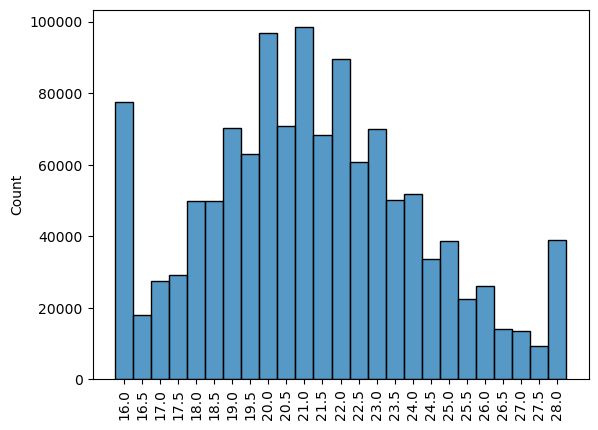

In [171]:
sns.histplot(sorted(train_actions))
plt.xticks(rotation=90)
plt.show()

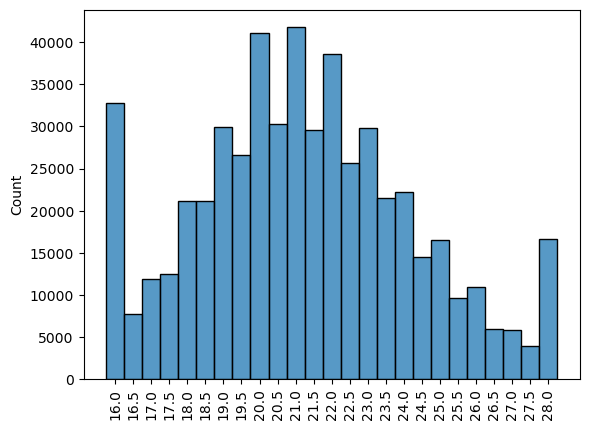

In [172]:
sns.histplot(sorted(test_actions))
plt.xticks(rotation=90)
plt.show()

In [173]:
train_trajectories[0]['observations'].shape

(8, 39)

In [174]:
# save file name
total_drives = climate_data_2021['c_driveid'].nunique()
total_events = climate_data_2021.shape[0]
total_features = len(train_trajectories[0]['features'])
reward_system = 'quadratic'
min_event_count = 5
# repeat_interval_sec = selected_time_interval
repeat_interval_sec = 0
version_no = 1

all_traj_pkl_file_name = f"all_trajectories_only_fahren_{total_drives}_drives_{total_events}_events_{total_features}_features_min_events_{min_event_count}_{repeat_interval_sec}s_interval_{reward_system}_rewards_{version_no}.pkl"
all_traj_pkl_file_name

'all_trajectories_only_fahren_238801_drives_2520827_events_39_features_min_events_5_0s_interval_quadratic_rewards_1.pkl'

In [175]:
# Save the trajectories
# Save the train and test trajectories as pickle files to load them later
import pickle
with open(f'../data/smart-climate-2021/datasets_with_non_filled_events/train-test-sets/smart-climate-train-trajectories-v{version_no}-wo-prev-target-temp.pkl', 'wb') as f:
    pickle.dump(train_trajectories, f)
with open(f'../data/smart-climate-2021/datasets_with_non_filled_events/train-test-sets/smart-climate-test-trajectories-v{version_no}-wo-prev-target-temp.pkl', 'wb') as f:
    pickle.dump(test_trajectories, f)
with open(f'../data/smart-climate-2021/all-trajs/{all_traj_pkl_file_name}_wo_prev_target_temp', 'wb') as f:
    pickle.dump(trajectories, f)

In [176]:
import pickle
with open(f'../data/smart-climate-2021/datasets_with_non_filled_events/train-test-sets/smart-climate-test-trajectories-v1-with-prev-target-temp.pkl', 'rb') as f:
    trajs = pickle.load(f)

In [177]:
len(trajs)

71640

In [ ]:
total_test_events = [len(traj) for traj in trajs]
sum(total_test_events)

In [ ]:
trajs[0]['features']

In [ ]:
import numpy as np
a = np.array([0,1])[:,None]
b = np.array([1,2,3])
b_new = np.broadcast_to(b,(a.shape[0],b.shape[0]))
c = np.concatenate((a,b_new),axis=1)
print(c)

In [ ]:
with open('/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/personalized-smart-climate/data/embeddings/van_specific_embeddings.pkl', 'rb') as f:
    van_specific_features = pickle.load(f)

In [ ]:
a_sample_van_id = list(van_specific_features.keys())[0]
van_specific_features[a_sample_van_id].shape

In [ ]:
b.shape

#### Prepare the validation and test dataset.

In [ ]:
# # Calculate the size for the training set
# indices = {i for i in range(len(trajectories))}
# train_indices = list(np.random.choice(list(indices), size=round(0.7*len(indices)), replace=False))
# remaining_indices = indices.difference(train_indices)

# val_indices = list(np.random.choice(list(remaining_indices), size=round(0.15*len(indices)), replace=False))
# remaining_indices = list(remaining_indices.difference(val_indices))

# test_indices = remaining_indices

# print(f"total test drives: {len(test_indices)}")
# print(f"total train drives: {len(train_indices)}")

# train_set = [trajectories[idx]for idx in train_indices]
# val_set = [trajectories[idx]for idx in val_indices]
# test_set = [trajectories[idx]for idx in test_indices]

# print("Train set:", len(train_set))
# print("Val set:", len(val_set))
# print("Test set:", len(test_set))

In [ ]:
# See the distribution

def extract_actions(trajs):
    actions = [traj['actions'] for traj in trajs]
    return actions
train_actions = np.concatenate(extract_actions(train_trajectories))
# val_actions = np.concatenate(extract_actions(test_trajectories))
test_actions = np.concatenate(extract_actions(test_trajectories))

In [ ]:
sns.histplot(train_actions, bins=25)

In [ ]:
sns.histplot(test_actions, bins=25)

In [ ]:
sns.histplot(test_actions, bins=25)

In [ ]:
print(train_actions.mean(), train_actions.std())
print(test_actions.mean(), test_actions.std())

In [ ]:
# Save the train and test trajectories as pickle files to load them later
import pickle
with open('../smart-climate/data/smart-climate/smart-climate-train-trajectories-v11.pkl', 'wb') as f:
    pickle.dump(train_set, f)
# with open('../smart-climate/data/smart-climate/smart-climate-val-trajectories-v11.pkl', 'wb') as f:
#     pickle.dump(val_set, f)
with open('../smart-climate/data/smart-climate/smart-climate-test-trajectories-v11.pkl', 'wb') as f:
    pickle.dump(test_set, f)
with open('../smart-climate/data/smart-climate/smart-climate-all-trajectories-v10-with-quad-rewards-1103-drives-only-fahren-and-climate-features-wo-prev-30s-interval.pkl', 'wb') as f:
    pickle.dump(trajectories, f)

### Merge the vehicle specific and contextual features together

In [ ]:
with open('/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/personalized-smart-climate/data/embeddings/van_specific_embeddings.pkl', 'rb') as f:
    van_specific_features = pickle.load(f)

In [ ]:
import pickle
dataset_path = f"../smart-climate/data/smart-climate/datasets_with_non_filled_events/train-test-sets/smart-climate-train-trajectories-v1-with-prev-target-temp.pkl"
with open(dataset_path, 'rb') as f:
    train_trajectories = pickle.load(f)

In [ ]:
dataset_path = f"../smart-climate/data/smart-climate/datasets_with_non_filled_events/train-test-sets/smart-climate-train-trajectories-v1-with-prev-target-temp.pkl"
with open(dataset_path, 'rb') as f:
    trajectories = pickle.load(f)
    
with open('/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/personalized-smart-climate/data/embeddings/van_specific_embeddings.pkl', 'rb') as f:
    van_specific_features = pickle.load(f)
    
for traj in trajectories:
    van_id = traj['van_id']
    van_feature = van_specific_features[van_id]
    
    observations = traj['observations']
    arr_tiled = np.tile(van_feature, (observations.shape[0], 1))
    traj['observations'] = np.concatenate((observations, arr_tiled), axis=1)

In [ ]:
trajectories[0]['observations'].shape

In [ ]:
a = np.random.rand(1, 3)
b = np.random.rand(1, 3)

np.hstack((a, b)).shape

#### Prepare the train and test set from global pool

In [ ]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
np.random.seed(42)

In [ ]:
dataset_path = f"../smart-climate/data/smart-climate/smart-climate-all-trajectories-v9-with-quad-rewards-1103-drives-only-fahren-wo-prev-30s-interval.pkl"
with open(dataset_path, 'rb') as f:
    all_trajectories = pickle.load(f)
len(all_trajectories)

In [ ]:
all_trajectories[0]['features']

In [ ]:
# Define a custom sorting key function
def sorting_key(dictionary):
    return (dictionary['traj_no'], dictionary['timestamp'])

In [ ]:
trajectories_list = []
for traj_no, traj in enumerate(all_trajectories):
    trajectories_list += [{f'traj_no': traj_no, 'timestamp': t, 'state': obs[0], 'action': obs[1], 'reward': obs[2], 'terminal': obs[3]} for t, obs in enumerate(zip(traj['observations'], traj['actions'], traj['rewards'], traj['terminals']))]
trajectories_arr = np.array(trajectories_list)    

In [ ]:
def apply_undersampling(trajectories_arr):
    y = np.array([traj['action'] for traj in trajectories_list]).reshape(-1, 1)
    y_resampled, y_resampled = rus.fit_resample(y, y)
    print("Class distribution after undersampling:", Counter(y_resampled))
    chosen_indices = rus.sample_indices_
    trajectories_arr = trajectories_arr[chosen_indices]
    return trajectories_arr

In [ ]:
do_undersamp = True
if do_undersamp:
    trajectories_arr = apply_undersampling(trajectories_arr)
    
num_samples = trajectories_arr.shape[0]
print(num_samples)

In [ ]:
train_idx = np.random.choice(num_samples, size=int(num_samples*0.8), replace=False)
test_idx = np.setdiff1d(np.arange(num_samples), train_idx)

In [ ]:
trajs_train = sorted(trajectories_arr[train_idx], key=sorting_key)
trajs_test = sorted(trajectories_arr[test_idx], key=sorting_key)

In [ ]:
print(f"Preparing the train trajectories")
keys = []
for traj in trajs_train:
    keys.append(traj['traj_no'])
keys = set(keys)
trajs_train_df = pd.DataFrame(trajs_train)

train_trajectories = []
for key in tqdm(keys):
    df_key = trajs_train_df[trajs_train_df['traj_no']==key]
    obss = np.array(df_key['state'].tolist())
    actions = np.array(df_key['action'].tolist())
    rewards = np.array(df_key['reward'].tolist())
    terminals = np.array(df_key['terminal'].tolist())
    train_trajectories.append(
        {
            'observations': obss,
            'actions': actions,
            'rewards': rewards,
            'terminals': terminals,
        }
    )

In [ ]:
# Prepare the test set
print(f"Preparing the test trajectories")
keys = []
for traj in trajs_test:
    keys.append(traj['traj_no'])
keys = set(keys)
trajs_test_df = pd.DataFrame(trajs_test)

test_trajectories = []
for key in tqdm(keys):
    df_key = trajs_test_df[trajs_test_df['traj_no']==key]
    obss = np.array(df_key['state'].tolist())
    actions = np.array(df_key['action'].tolist())
    rewards = np.array(df_key['reward'].tolist())
    terminals = np.array(df_key['terminal'].tolist())
    terminals[-1] = True
    test_trajectories.append(
        {
            'observations': obss,
            'actions': actions,
            'rewards': rewards,
            'terminals': terminals,
        }
    )

In [ ]:
import seaborn as sns
test_actions = np.concatenate([test_traj['actions'] for test_traj in train_trajectories])
sns.histplot(test_actions)

In [ ]:
print(f"min events per drive in train set: {trajs_train_df['traj_no'].value_counts().min()} and in the test set: {trajs_test_df['traj_no'].value_counts().min()}")

In [ ]:
train_set_path = "/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/smart-climate/data/smart-climate/smart-climate-train-trajectories-from-v9-global-pool-undersampled-v1.pkl"

In [ ]:
test_set_path = "/home/q621464/Desktop/Thesis/code/decision-transformer-thesis/smart-climate/data/smart-climate/smart-climate-test-trajectories-from-v9-global-pool-undersampled-v1.pkl"

In [ ]:
with open (train_set_path, 'wb') as f:
    pickle.dump(train_trajectories, f)
    
with open (test_set_path, 'wb') as f:
    pickle.dump(test_trajectories, f)

### Apply Undersampling

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Generate a synthetic imbalanced dataset
# X, y = make_classification(n_samples=1000, n_features=10, weights=[0.95, 0.05], random_state=42)

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Get the indices of chosen instances
chosen_indices = rus.sample_indices_

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Display the indices of chosen instances
print("Chosen instance indices after undersampling:", chosen_indices)


In [ ]:
all_observations = [traj['observations'] for traj in all_trajectories]
all_actions = [traj['actions'] for traj in all_trajectories]

X = np.concatenate(all_observations)
y = np.concatenate(all_actions)
X.shape, y.shape

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Generate a synthetic imbalanced dataset
# X, y = make_classification(n_samples=1000, n_features=10, weights=[0.95, 0.05], random_state=42)

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Get the indices of chosen instances
chosen_indices = rus.sample_indices_

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Display the indices of chosen instances
print("Chosen instance indices after undersampling:", chosen_indices)


In [ ]:
X_resampled[0]

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Generate a synthetic imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=10, weights=[0.95, 0.05], random_state=42)

# Display class distribution before undersampling
print("Class distribution before undersampling:", Counter(y))

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Get the indices of chosen instances
chosen_indices = rus.sample_indices_

# Display class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

# Display the indices of chosen instances
print("Chosen instance indices after undersampling:", chosen_indices)
